<p style="color:#FFF; background:#06D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left">Version 2025-06</span>
<span style="width:49%; display:inline-block; text-align:right">Licence CC–BY–NC–ND</span>
<span style="font-size:40px; font-style:normal"><b>EXERCICES : MATPLOTLIB</b></span><br>
<span style="width:49%; display:inline-block; text-align:left">Christophe Schlick</span>
<span style="width:49%; display:inline-block; text-align:right">schlick ಄ u<b>-</b>bordeaux • fr</p>

---
> ***ATTENTION : Les exercices E5 et E6 ne seront pas traités en TD, mais pourront être faits en travail personnel et mis sur votre espace www au CREMI, selon les modalités définies sur le site web du cours***
---

In [1]:
import numpy as np # import du package 'numpy' avec alias 'np'
import matplotlib.pyplot as mp # import du package 'matplotlib' avec alias 'mp'
from ipywidgets import interact, interact_manual # import des fonctions d'interaction
from SRC.tools import show # import de la fonction 'show'
mp.style.use('default') # utilisation du style 'default' pour les figures
import warnings; warnings.filterwarnings('ignore') # suppression des 'warning' de l'interpréteur

<h2 style="padding:16px; color:#FFF; background:#06D">Exercice E1 - Simulation du jeu "Spirograph"</h2>

Le jeu [**Spirograph**](https://fr.wikipedia.org/wiki/Spirographe_(jeu)) permet de tracer deux familles de courbes paramétriques, respectivement appelées **[hypotrochoïdes](https://fr.wikipedia.org/wiki/Hypotrocho%C3%AFde)** (correspondant à la trajectoire d'un point placé sur un petit cercle roulant sans glisser à l'intérieur d'un grand cercle) et **[épitrochoïdes](https://fr.wikipedia.org/wiki/%C3%89pitrocho%C3%AFde)** (idem lorsque le petit cercle roule sans glisser à l'extérieur du grand cercle).

Ces familles de courbes sont modélisées par l'équation paramétrique suivante :

$$
\Big(a\cos\theta + cd\cos b\theta\;\;,\,\;a\sin\theta + c\sin b\theta\Big)\;\;\;\;{\sf avec}
\;\;\;\; a = p+qd \;\;,\,\; b = \frac{a}{q} \;\;,\,\; c = qr \;\;,\,\; d = \pm 1
$$

qui utilise les quatre paramètres géométriques $(p, q, r, d)$ :

- $p$ = le rayon du grand cercle
- $q$ = le rayon du petit cercle, avec $q < p$
- $r$ = le ratio entre la distance au centre et le rayon du petit cercle, pour le point dont on trace le mouvement
- $d$ = 1 pour les épitrochoïdes et $d$ = -1 pour les hypotrochoïdes

Le but de l'exercice est de créer une visualisation interactive des trochoïdes en utilisant les fonctionnalités des bibliothèques **matplotlib** et **ipywidgets**. La figure ci-dessous présente un exemple de visualisation que l'on cherche à obtenir :

<center>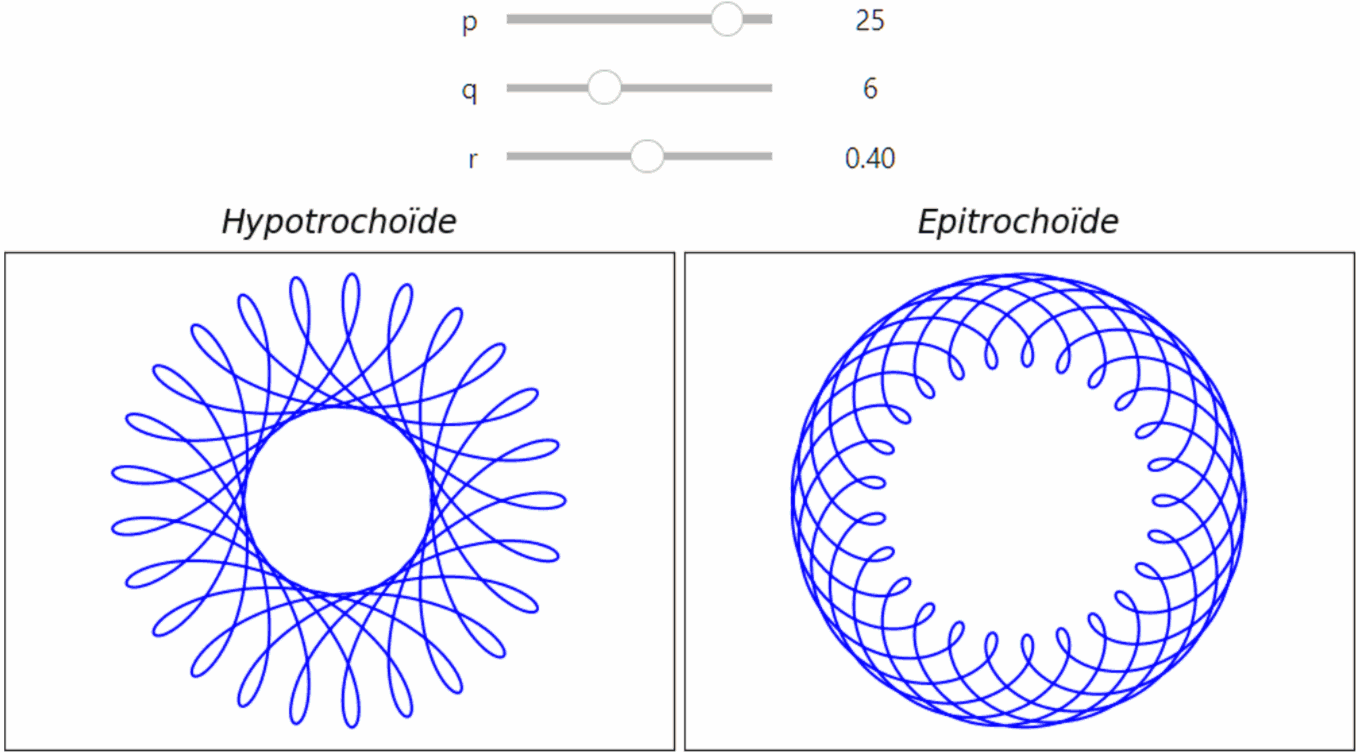</center>

---
En s'inspirant de l'exemple des courbes de Lissajous du chapitre 6, écrire une fonction **`trochoid(p, q, r, hypo=True)`** qui renvoie un couple de vecteurs **numpy** contenant les coordonnées $x$ et $y$ obtenues en échantillonnant une trochoïde définie par les arguments de la fonction : les valeurs **`p`**, **`q`**, **`r`** correspondent à ceux utilisés dans l'équation précédente, et le paramètre **`hypo`** est un booléen permettant de déterminer si la fonction doit échantillonner une hypotrochoïde ou une épitrochoïde. La fonction devra générer un vecteur **numpy** **`t`** correspondant à l'échantillonnage de l'angle $\theta \in [0, 2q\pi]$ qui permettra de définir les vecteurs **`x`** et **`y`**  retournés par la fonction. Avec 2000 échantillons pour $\theta$, on aura suffisamment de points pour un tracé précis, même pour les trochoïdes les plus complexes.

On peut sans (trop) de perte de généralité, limiter l'étude aux cas où les deux rayons $p$ et $q$ sont à valeurs entières, ce qui permet de garantir que la trajectoire obtenue sera périodique (la période sera proportionnelle au PPCM des deux entiers). De même, plutôt que de définir directement le ratio $r$, on va fournir à la fonction paramétrique, le logarithme en base 2 de ce ratio, $\rm{log_2}(r)$, qui permet de produire des variations plus uniformes pour les formes résultantes.



In [2]:
def trochoid(p, q, r, hypo=True):
  """generate sampling for a hypotrochoid/epitrochoid curve defined by parameters (p, q, r, hypo)"""
  # TODO : penser à faire r = 2**r pour retrouver la valeur de 'r' utilisée dans l'équation

In [4]:
x,y = trochoid(3, 2, 1) # on teste l'implémentation sur un exemple
show("x.min(); x.max()") # x varie entre -3 et 5
show("y.min(); y.max()") # y varie entre -4.4 et 4.4

x.min() ➤ -3.0
x.max() ➤ 4.9999901205236705
y.min() ➤ -4.403662381065338
y.max() ➤ 4.403662381065338


---
Ecrire une fonction **`spiro(p, q, r, hypo=True)`** qui utilise la bibliothèque **matplotlib** pour visualiser le tracé de la trochoïde définie par la fonction précédente, en fonction du jeu de paramètres **`(p, q, r, hypo)`**

In [5]:
def spiro(p, q, r, hypo=True):
  """plot the curve of an hypotrochoid/epitrochoid defined by parameters (p, q, r, hypo)"""
  # TODO

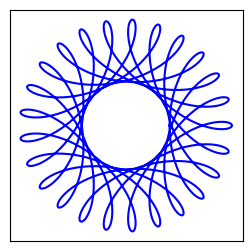

In [7]:
spiro(25, 6, 0.4, True) # on doit obtenir l'hypotrochoïde présentée à gauche sur la figure précédente

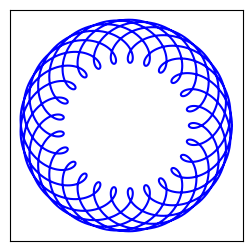

In [8]:
spiro(25, 6, 0.4, False) # on doit obtenir l'épitrochoïde présentée à droite sur la même figure

---
Enfin, écrire une fonction **`bispiro(p, q, r)`** qui permet d'afficher dans la même figure, les tracés de l'hypotrochoïde et de l'épitrochoïde, avec le même jeu de paramètres **`(p, q, r)`** selon le modèle de la figure au début de l'exercice. On rajoutera des widgets d'interaction du package **`ipywidgets`** afin de permettre à l'utilisateur de saisir les valeurs des paramètres de manière interactive, avec les intervalles de variation suivants pour les trois paramètres :

- $p \in [1,30]$ (avec un pas de 1)
- $q \in [1,30]$ (avec un pas de 1)
- $r \in [-10,10]$ (avec un pas de 0.1)

In [ ]:
# TODO

<h2 style="padding:16px; color:#FFF; background:#06D">Exercice E2 - Approximation polynomiale</h2>

Cet exercice propose d'utiliser le module **`np.polynomial`** pour effectuer l'approximation polynomiale $P_n(x)$ d'une fonction arbitraire de la forme $y = f(x)$. En particulier, on va vérifier que pour un degré de polynôme donné, l'utilisation de la **[base polynomiale $T_n(x)$ de Chebyshev](https://fr.wikipedia.org/wiki/Polyn%C3%B4me_de_Tchebychev)** donne des biens meilleures approximations que celles fournies par la **base canonique $M_n(x)$ des monômes** (limitation du ***phénomène de Runge***). La mise en oeuvre de cette technique sera illustrée en utilisant quatre fonctions de difficulté croissante, au sens de l'approximation polynomiale :

- $f_a(x)$ : fonction affine à laquelle on rajoute une perturbation sinusoïdale de basse fréquence
- $f_b(x)$ : fonction quadratique avec une perturbation sinusoïdale de moyenne fréquence
- $f_c(x)$ : fonction $f_a(x)$ à laquelle on rajoute une perturbation aléatoire de haute fréquence
- $f_d(x)$ : fonction $f_b(x)$ avec la même perturbation aléatoire que $f_c(x)$

In [10]:
size = 200 # nombre d'échantillons utilisés pour le tracé et l'approximation des fonctions
x = np.linspace(-10, 10, size) # échantillonnage uniforme de l'intervalle de tracé [-10, 10]
fa = lambda x: 1 + 3*x + 4*np.sin(x) # fonction affine avec perturbation sinusoïdale
fb = lambda x: 25 - 0.5*x*x + 5*np.sin(2.5*x) # fonction quadratique avec perturbation sinusoïdale
noise = np.random.normal(0, 2, size) # perturbation aléatoire par échantillon (distribution normale)
fc = lambda x: fa(x) + noise # fonction fa avec perturbation aléatoire
fd = lambda x: fb(x) + noise # fonction fb avec perturbation aléatoire

---
### 1 - Affichage des fonctions de test

Pour visualiser ces fonctions avec le package **matplotlib**, on va écrire une fonction **`plot_funcs(x, funcs, title='')`** qui permet de tracer, sur une même figure, un ensemble de fonctions stockées dans un dictionnaire. Le paramètre **`x`** est un vecteur stockant les échantillons sur l'axe horizontal correspondant à l'intervalle utilisé pour le tracé des fonctions, et chaque élément du dictionnaire **`funcs`** va associer une chaîne de caractères **`name`** à une fonction universelle **`func`** qui sera appliquée au vecteur **`x`** pour obtenir les échantillons sur l'axe vertical. La chaîne **`title`** servira de titre global à la figure générée, et chacune des chaînes **`name`** sera utilisée pour identifier la courbe sur la légende correspondante.

In [11]:
def plot_funcs(x, funcs, title=''):
  """plot all functions, stored in dictionary 'funcs', computed on a vector of samples stored in 'x'"""
  # s'inspirer de l'exemple A3 du chapitre 6

Tester la fonction **`plot_funcs`** sur les quatre fonctions de test $f_a, f_b, f_c$ et $f_d$ :

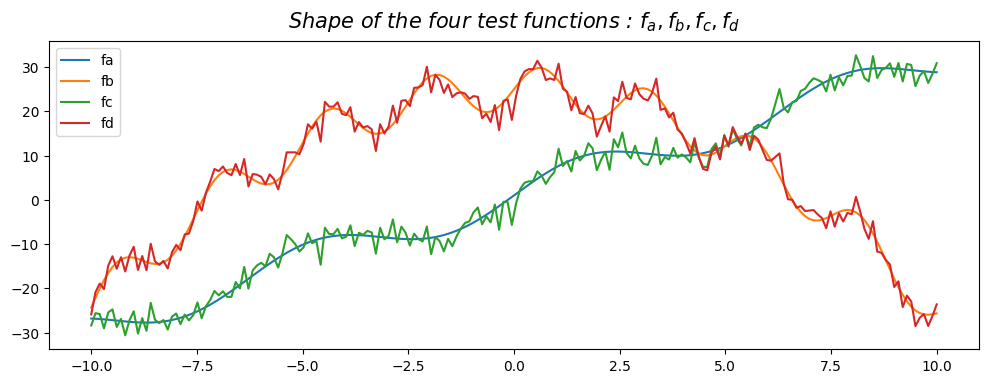

In [13]:
funcs = dict(fa=fa, fb=fb, fc=fc, fd=fd) # on associe chaque fonction à sa chaîne de caractères
plot_funcs(x, funcs, 'Shape of the four test functions : $f_a, f_b, f_c, f_d$')

---
### 2 - Base des monômes et base de Chebyshev

Le module **`polynomial`** de **numpy** contient un certain nombre de classes (au sens du paradigme de la programmation objet) correspondant à des bases polynomiales classiques. On commence donc par importer la base des monônes (classe **`Polynomial`**) et la base de Chebyshev (classe **`Chebyshev`**) en utilisant les alias classiques, **`M`** et **`T`**, respectivement :

In [14]:
from numpy.polynomial import Polynomial as M # import de la classe 'Polynomial' (base des monômes)
from numpy.polynomial import Chebyshev as T # import de la classe 'Chebyshev' (base de Chebyshev)

In [15]:
for n in range(6): # on affiche les 6 premiers polynômes de chacune des deux bases
  print(f"M_{n}(x) = {M.basis(n)}\nT_{n}(x) = {T.basis(n)}")

M_0(x) = 1.0
T_0(x) = 1.0
M_1(x) = 0.0 + 1.0 x
T_1(x) = 0.0 + 1.0 T_1(x)
M_2(x) = 0.0 + 0.0 x + 1.0 x**2
T_2(x) = 0.0 + 0.0 T_1(x) + 1.0 T_2(x)
M_3(x) = 0.0 + 0.0 x + 0.0 x**2 + 1.0 x**3
T_3(x) = 0.0 + 0.0 T_1(x) + 0.0 T_2(x) + 1.0 T_3(x)
M_4(x) = 0.0 + 0.0 x + 0.0 x**2 + 0.0 x**3 + 1.0 x**4
T_4(x) = 0.0 + 0.0 T_1(x) + 0.0 T_2(x) + 0.0 T_3(x) + 1.0 T_4(x)
M_5(x) = 0.0 + 0.0 x + 0.0 x**2 + 0.0 x**3 + 0.0 x**4 + 1.0 x**5
T_5(x) = 0.0 + 0.0 T_1(x) + 0.0 T_2(x) + 0.0 T_3(x) + 0.0 T_4(x) + 1.0 T_5(x)


In [16]:
for n in range(6): # on convertit les 6 premiers polynômes de Chebyshev sur la base monomiale
  print(f"T_{n}(x) = {T.basis(n).convert(kind=M)}")

T_0(x) = 1.0
T_1(x) = 0.0 + 1.0 x
T_2(x) = -1.0 + 0.0 x + 2.0 x**2
T_3(x) = 0.0 - 3.0 x + 0.0 x**2 + 4.0 x**3
T_4(x) = 1.0 + 0.0 x - 8.0 x**2 + 0.0 x**3 + 8.0 x**4
T_5(x) = 0.0 + 5.0 x + 0.0 x**2 - 20.0 x**3 + 0.0 x**4 + 16.0 x**5


---
### 3 - Affichage des polynômes correspondant aux deux bases

Pour mieux comprendre le comportement des polynômes $M_n(x)$ et $T_n(x)$ composant les deux bases, on va écrire une fonction **`plot_basis(basis, n=6)`** permettant de tracer les **`n`** premiers polynômes d'une base **`basis`** sur un intervalle $[-1,1]$, en appelant la fonction **`plot_funcs`** créée précédemment :

In [17]:
def plot_basis(basis, n=6):
  """plot the 'n' first terms of the provided polynomial 'basis' on range [-1,1]"""
  # utiliser une liste 'basis' pour stocker les fonctions de base
  # et une liste 'names' pour stocker les noms des fonctions (utilisés pour la légende)
  # appeler la fonction 'plot_funcs' pour afficher chaque fonction de base

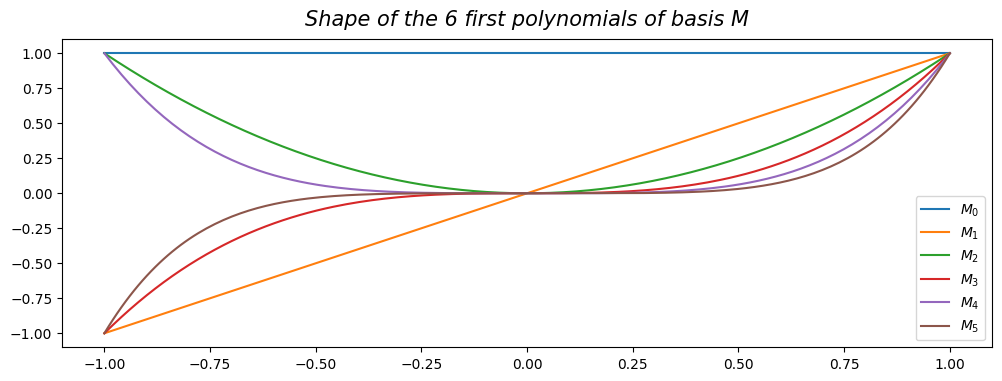

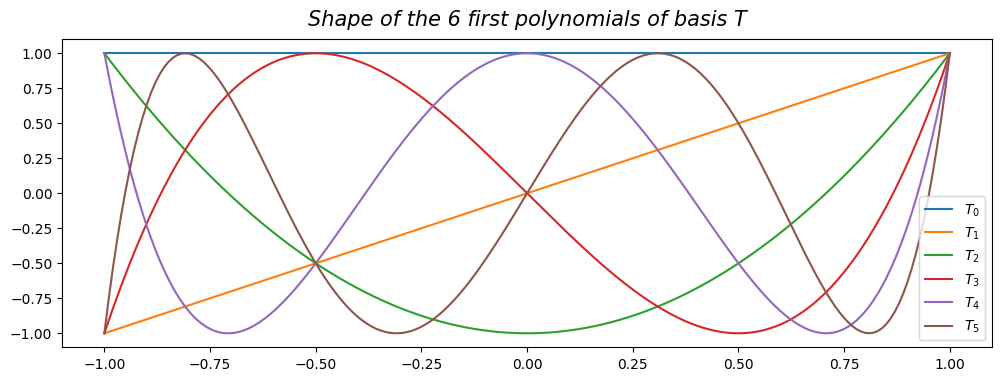

In [19]:
plot_basis(M) # on trace les 6 premiers polynômes de la base des monômes
plot_basis(T) # on trace les 6 premiers polynômes de la base de Chebyshev

---
### 4 - Calcul des approximants polynomiaux

Les classes **`M`** et **`T`** possèdent une méthode **`fit(x, y, n)`** qui permet de calculer le meilleur approximant polynomial de degré $n$ de la fonction $y = f(x)$ en se basant sur les vecteurs d'échantillonnage $x = [x_k]$ et $y = [y_k]$. En utilisant une nouvelle fois la fonction **`plot_funcs`**, écrire une fonction **`plot_fits(name, basis, degrees)`** qui affiche un ensemble d'approximants polynomiaux avec différents degrés, pour une des quatre fonctions de test. Le paramètre **`name`** est la clé identifiant la fonction à approximer dans le dictionnaire **`funcs`** défini plus haut, le paramètre **`basis`** correspond à la base polynomiale à utiliser pour l'approximation (**`M`** pour la base monomiale ou **`T`** pour la base de Chebyshev), et le paramètre **`degrees`** est une liste d'entiers définissant les degrés des polynômes à utiliser pour calculer l'approximant.

In [20]:
def plot_fits(name, basis, degrees):
  """plot polynomial approximants for function 'name' using provided 'basis' and 'degrees'"""
  # créer un dictionnaire 'fits' qui stocke les approximants de 'name' pour différents degrés
  # afficher la fonction et ses approximants en utilisant 'plot_funcs'

Utiliser la fonction **`plot_fits`** pour trouver le degré minimal des polynômes qu'il faut utiliser afin d'obtenir un approximant polynomial qui soit visuellement indifférentiable de la courbe originelle, pour chacune des quatre fonctions de test $f_a, f_b, f_c$ et $f_d$. Tester d'abord avec la base des monômes, puis avec la base de Chebyshev...

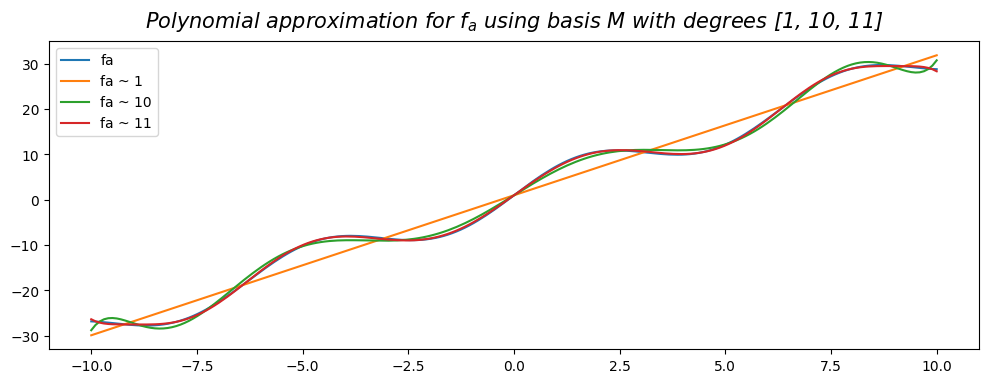

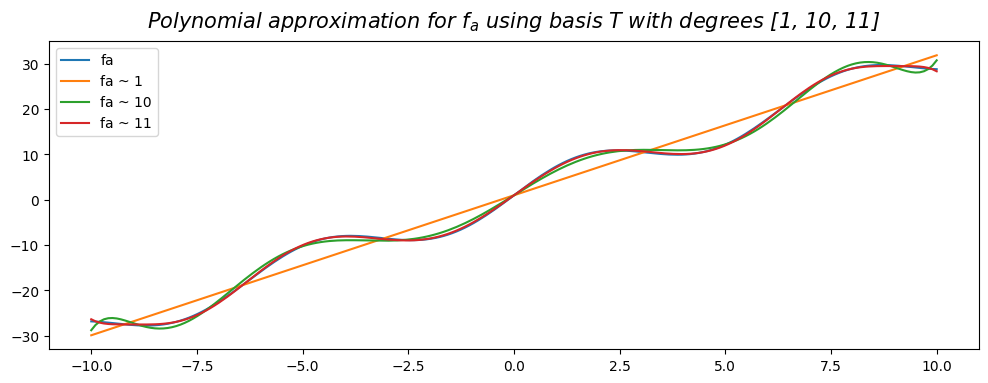

In [22]:
plot_fits('fa', M, [1,10,11]) # le degré 11 n'est plus différentiable de la fonction initiale
plot_fits('fa', T, [1,10,11]) # idem

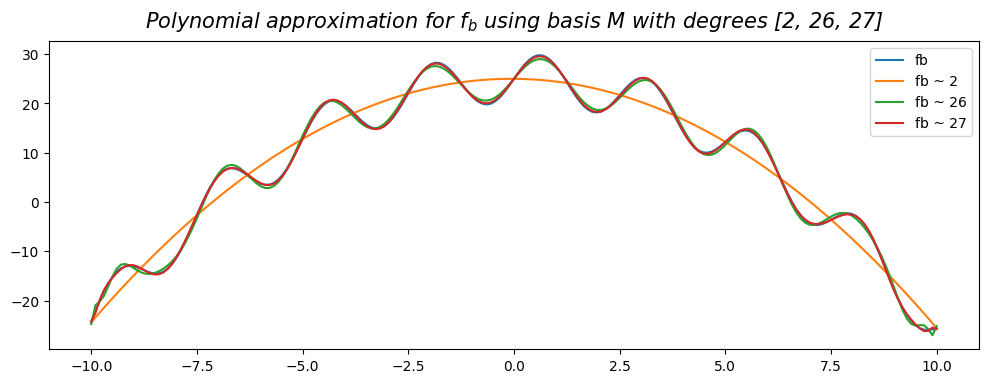

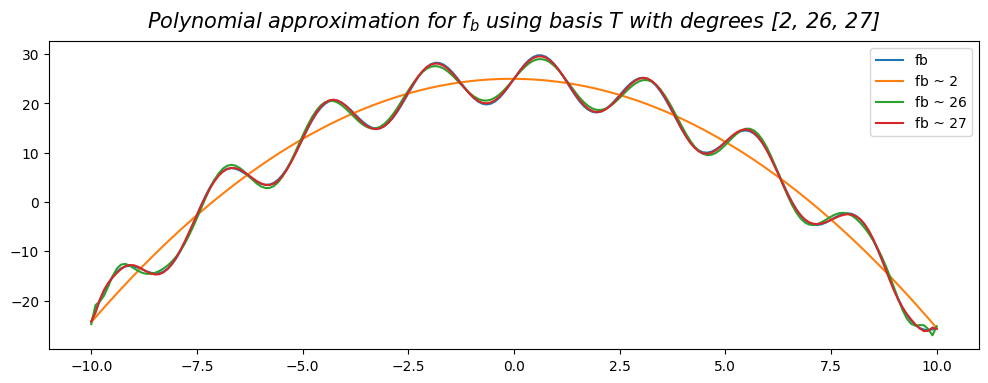

In [23]:
plot_fits('fb', M, [2,26,27]) # le degré 27 n'est plus différentiable de la fonction initiale
plot_fits('fb', T, [2,26,27]) # idem

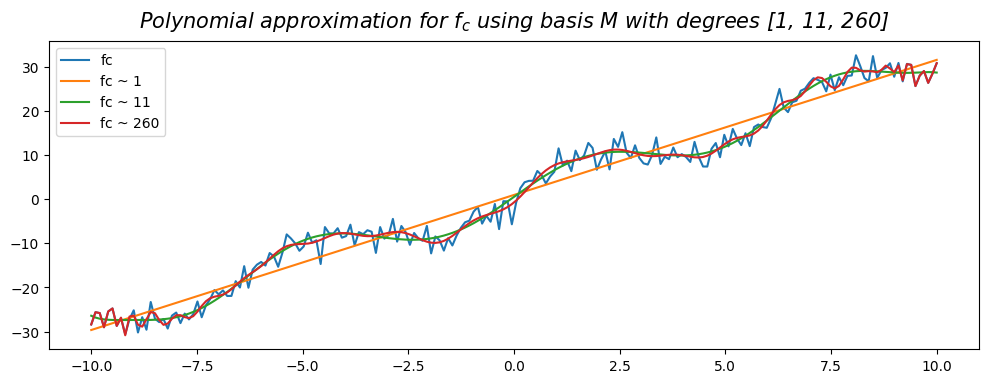

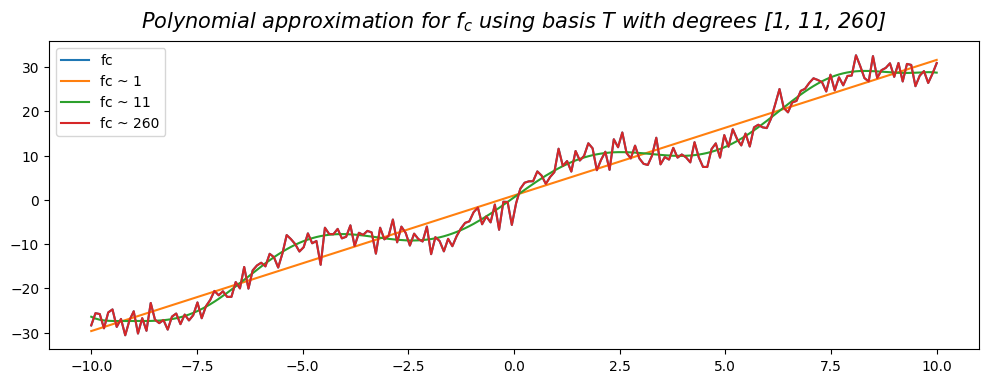

In [24]:
plot_fits('fc', M, [1,11,260]) # le degré 260 donne une approximation à peine meilleure que le degré 11
plot_fits('fc', T, [1,11,260]) # le degré 260 n'est plus différentiable de la fonction initiale

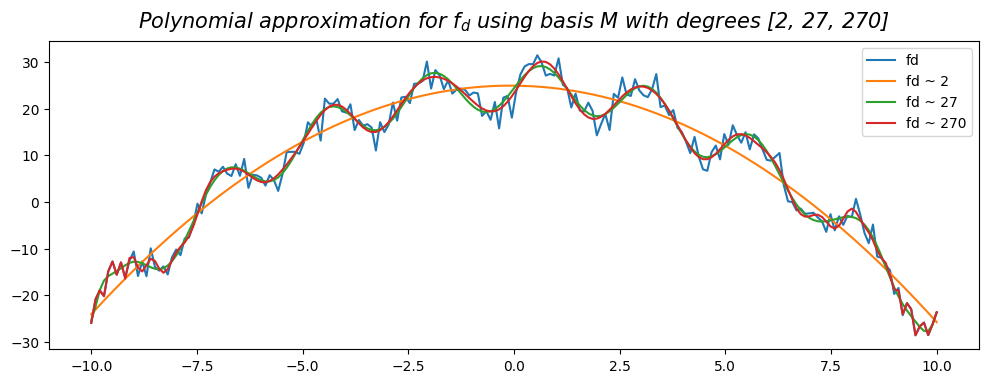

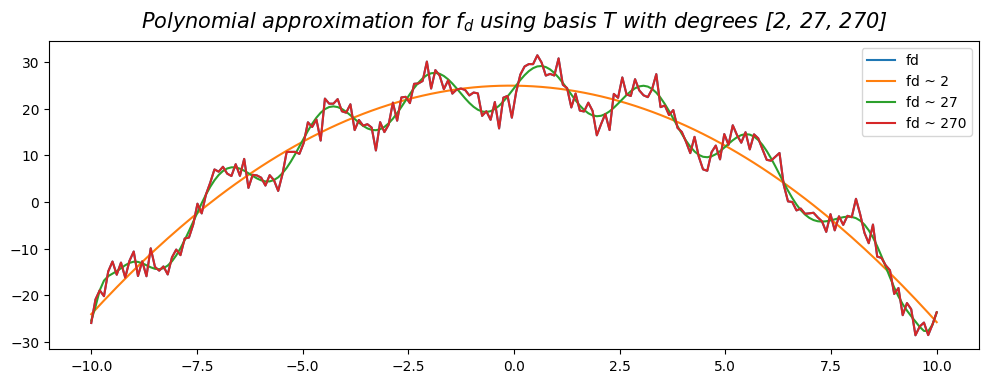

In [25]:
plot_fits('fd', M, [2,27,270]) # le degré 270 donne une approximation à peine meilleure que le degré 27
plot_fits('fd', T, [2,27,270]) # le degré 270 n'est plus différentiable de la fonction initiale

---
### 5 - Evolution de l'erreur d'approximation en fonction du degré des polynômes

Pour avoir une estimation plus formelle de la qualité des approximants polynomiaux, on va calculer la racine de l'erreur quadratique moyenne (habituellement notée **rmse** pour ***root mean square error***) entre les échantillons de la fonction initiale et ceux de l'approximant, et tracer son évolution en fonction du degré du polynôme utilisé pour l'approximation.

Le package **numpy** ne possède pas de fonction **`rmse`** pour calculer cette différence entre deux vecteurs d'échantillons, mais elle s'écrit de manière triviale :

In [26]:
def rmse(a, b):
  """return root mean square error between two arrays 'a' and 'b'"""
  return np.mean((a-b) ** 2) ** 0.5

Ecrire une fonction **`plot_rmse(name, limit)`** qui va afficher l'évolution de cette **rmse** lorsqu'on fait varier le degré de l'approximant polynomial, en utilisant respectivement la base des monômes et celle de Chebyshev. Le paramètre **`name`** correspond au nom de la fonction à approximer (parmi les 4 fonctions de test) et le paramètre **`limit`** correspond au degré maximum à utiliser. Pour avoir des résultats plus explicites, on utilisera une échelle logarithmique pour l'axe vertical :

In [27]:
def plot_rmse(name, limit):
  """plot RMSE (in log scale) for polynomial approximants of function 'name', up to 'limit' degree"""
  # créer une liste 'degrees' pour stocker les degrés utilisés (entre 1 et limite)
  # créer 2 listes 'rmseM' et 'rmseT' pour stocker les erreurs en fonction du degré de l'approximant
  # afficher les erreurs obtenus pour les 2 bases polynomiales

On compare la qualité des approximants sur les quatre fonctions de test :

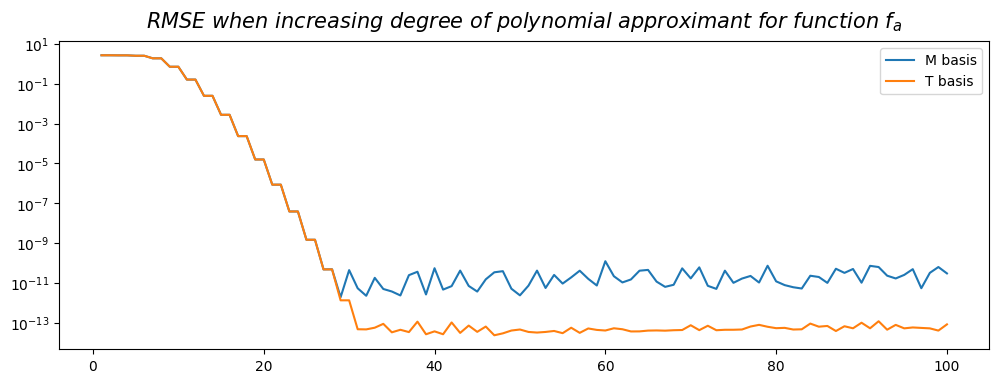

In [29]:
plot_rmse('fa', 100)

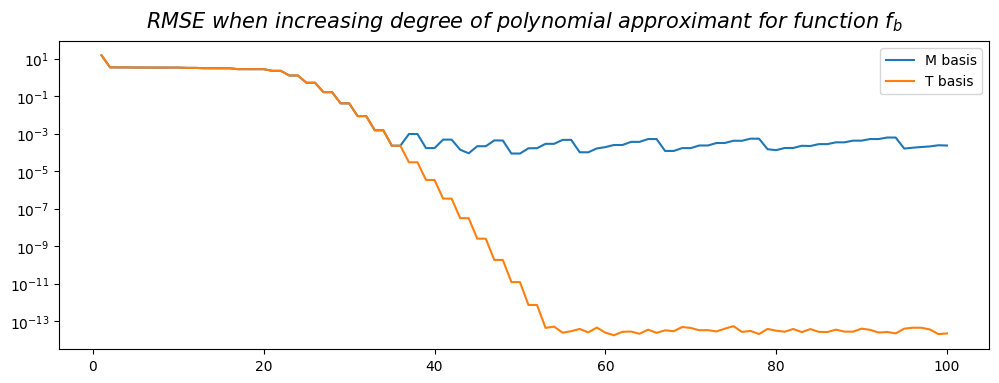

In [30]:
plot_rmse('fb', 100)

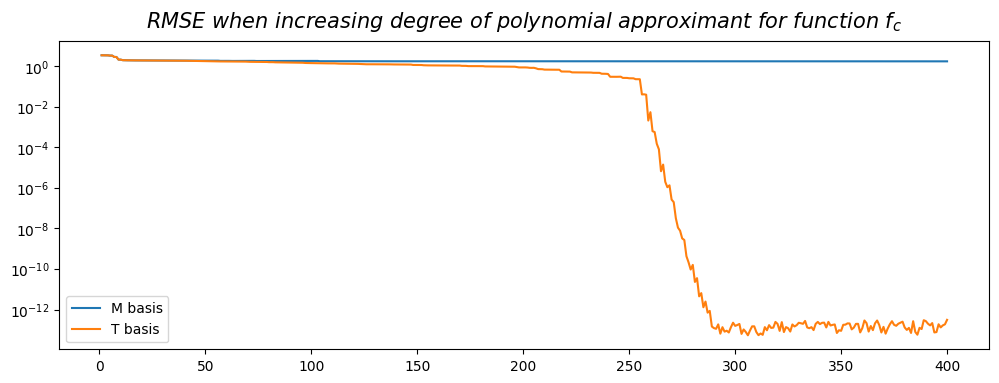

In [31]:
plot_rmse('fc', 400)

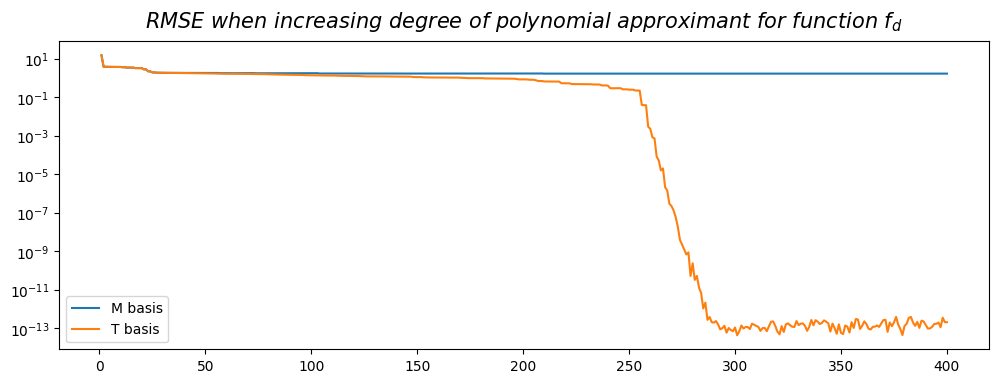

In [32]:
plot_rmse('fd', 400)

***Que peut-on conclure de ces figures ?***

<h2 style="padding:16px; color:#FFF; background:#06D">Exercice E3 - Marches aléatoires</h2>

On souhaite effectuer la simulation de différentes **marches aléatoires** dans un espace discret de dimension 1, 2 ou 3. Pour cela, on va simuler le déplacement d'une particule dans cet espace, dont la position va être modifiée aléatoirement, à chaque étape temporelle, selon une certaine distribution statistique.

Plus précisément, la position de la particule est représentée par une série chronologique $p_n$ définie par :

$$p_0 = d_0 \,,\, p_1 = p_0 + d_1 \,,\, ... \,,\, p_n = p_{n-1} + d_{n} \,,\, ...$$

où $d_n$ correspond à un choix équiprobable parmi un ensemble de déplacements élémentaires, définis sous la forme de listes à valeurs entières. Voici quelques exemples de **listes de déplacements élémentaires** qui seront utilisés pour les simulations mises en oeuvre, et que l'on regroupe dans un dictionnaire **`disp`** pour simplifier les manipulations :

In [33]:
dA, dB, dC, dD, dE, dF = [-1,1], [-2,2], [-1,0,0,0,0,1], [-2,-1,0,1,2], [1,1,1,1,-4], [-2,0,3]
disp = dict(dA=dA, dB=dB, dC=dC, dD=dD, dE=dE, dF=dF) # regroupement des listes dans un dictionnaire

> **Note :** Lorsque la somme des éléments d'une telle liste est nulle, les déplacements vers l'avant et vers l'arrière seront équilibrés, alors que si cette somme n'est pas nulle, l'une des deux directions de déplacement sera privilégiée (en avant pour une somme positive, en arrière pour une somme négative)

On fournit également une fonction `plot_walks(walks, title='')` permettant d'afficher un ensemble de marches aléatoires (définies soit par des positions successives, soit par des distances successives) stockées dans un dictionnaire **`walks`**, chacune étant associée à une chaîne de caractères qui sera utilisée comme étiquette pour la légende de la figure. Le vecteur contenant l'échantillonnage temporel (axe horizontal du tracé) n'est pas fourni, mais est calculé directement en fonction de la plus longue des séries chronologiques stockées dans le dictionnaire :

In [34]:
def plot_walks(walks, title=''):
  """plot all random walks stored in 'walks' dict (x-axis = time, y-axis = position or distance)"""
  mp.figure(figsize=(12,4), dpi=100) # set size and precision for figure
  ns = max(walk.size for walk in walks.values()) # nb of steps for longest walk in dictionary
  for name, walk in walks.items(): # loop over all walks stored in dictionary
    mp.plot(np.arange(ns), walk, label=name) # plot current walk and use its name as label
  mp.legend(); mp.title(title, pad=10, fontsize=15, style='italic') # show legend and title on figure

### 1 - Simulation d'une marche aléatoire 1D

Pour simuler une marche aléatoire 1D, il faut créer deux vecteurs avec les outils fournis par **numpy** :
- un vecteur **`d`** contenant la suite de déplacements piochés aléatoirement dans la liste des déplacements
- un vecteur **`p`** contenant la suite de positions, par accumulation des déplacements aléatoires

A partir de ces éléments, écrire une fonction **`random_walk(name, ns)`** qui renvoit le vecteur **`p`** de la suite des positions, en piochant aléatoirement chaque déplacement dans la liste **`name`** stockée dans le dictionnaire **`disp`** défini ci-dessus. Le paramètre **`ns`** (***number of steps***) correspond au nombre d'étapes temporelles à utiliser pour générer les positions :

In [35]:
def random_walk(name, ns):
  """return a vector of 'ns' random positions, using walk steps based on displacement list 'name'"""
  # utiliser les fonctions 'np.random.choice' et 'np.cumsum'

On affiche les marches aléatoires obtenues avec différentes configurations pour **`name`** et **`ns`** :

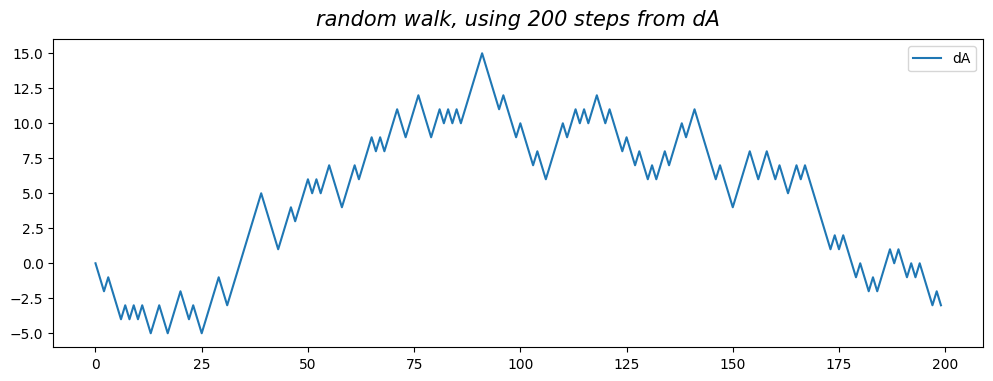

In [37]:
name, ns = 'dA', 200; # changer les valeurs pour tester différentes configurations
plot_walks({name:random_walk(name, ns)}, f"random walk, using {ns} steps from {name}")

### 2 - Simulation d'une séquence de marches aléatoires 1D

Pour effectuer la simulation de plusieurs marches aléatoires avec les mêmes paramètres, il suffit de créer une matrice de déplacements aléatoires (au lieu d'un vecteur) et d'accumuler les déplacements le long des colonnes de cette matrice. Ecrire une fonction **`random_walks(name, ns, nw)`** qui implémente ce principe : par rapport à **`random_walk`**, on rajoute simplement le paramètre **`nw`** (***number of walks***) permettant de choisir le nombre de marches aléatoires à simuler :

In [38]:
def random_walks(name, ns, nw):
  """return a matrix of 'nw'x'ns' random positions, using walk steps based on displacement list 'name'"""
  # il faut simuler plusieurs marches aléatoires en parallèle (dans une matrice de taille nw x ns)

On affiche les marches aléatoires obtenues avec différentes configurations pour **`name`**, **`ns`** et **`nw`** :

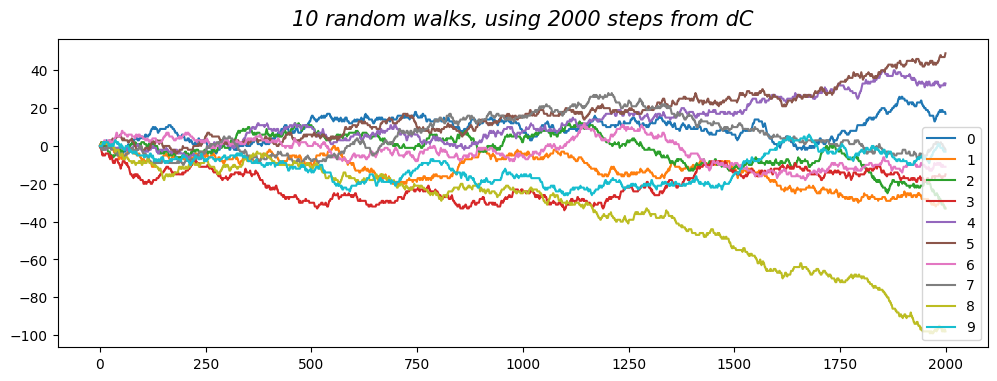

In [40]:
name, ns, nw = 'dC', 2000, 10 # changer les valeurs pour tester différentes configurations
walks = random_walks(name, ns, nw)
plot_walks(dict(zip(range(nw), walks)), f"{nw} random walks, using {ns} steps from {name}")

### 3 - Position moyenne et distance moyenne parcourue

La propriété remarquable des marches aléatoires 1D s'observe en calculant et en comparant, sur un grand nombre de simulations, la ***position moyenne de la particule*** et la ***distance moyenne parcourue par la particule*** au cours du temps.

Ecrire la suite d'instructions permettant de créer une variable **`position`** stockant le vecteur des positions moyennes, et une variable **`distance`** stockant le vecteur des distances moyennes parcourue (à nouveau, on utilisera les variables **`name`**, **`ns`** et **`nw`** pour spécifier différentes configurations). Afficher les vecteurs **`position`** et **`distance`** sur la même figure, en utilisant la fonction **`plot_walks`** :

In [41]:
name, ns, nw = 'dA', 2000, 10000 # changer les valeurs pour tester différentes configurations
# TODO

### 4 - Carré de la distance moyenne parcourue

Pour toute marche aléatoire 1D dont les déplacements sont piochés dans une liste à somme nulle, ***le carré de la distance moyenne parcourue est proportionnel au nombre d'étapes temporelles***. Ce résultat n'est pas valide si la somme des éléments de la liste des déplacements élémentaires n'est pas nulle.

Ecrire la séquence d'instructions permettant une vérification expérimentale de ce résultat pour chacune de nos listes de test **`dA`**, **`dB`**, **`dC`**, **`dD`**, **`dE`** (à somme nulle) et **`dF`** (à somme non nulle) :

In [43]:
distances, ns, nw = {}, 2000, 10000 # nombre de pas et nombre de marches
# TODO

### 5 - Simulation d'une marche aléatoire 2D

Pour simuler une marche aléatoire 2D, il y a deux approches possibles pour définir le problème à résoudre :

- soit on considère que les déplacements aléatoires sur chacun des 2 axes sont des processus indépendants, ce qui revient à dire qu'une marche aléatoire 2D est simplement la combinaison de 2 marches aléatoires 1D : l'une fournit les positions sur l'axe $x$ et l'autre les positions sur l'axe $y$

- soit on considère que les déplacements aléatoires sur les 2 axes sont des processus liés, et dans ce cas, il faut fournir une liste de déplacements élémentaires composés de couples $(dx,dy)$

La seconde approche est en fait un sur-ensemble de la première (pour simuler la première approche avec la seconde, il suffit de définir la liste des couples comme le produit cartésien des listes de déplacement sur les 2 axes). Pour des raisons de simplicité, on va traiter uniquement la première approche dans cet exercice (la mise en oeuvre de la seconde approche est laissée en travail personnel).

Ecrire une fonction **`plot_walk2D(xname, yname, ns)`** qui permet de générer et d'afficher une marche aléatoire 2D de **`ns`** étapes temporelles, en utilisant la liste **`xname`** (resp. **`yname`**) pour le choix des déplacements aléatoires en $x$ (resp. $y$). On forcera la figure à utiliser la même échelle pour les axes $x$ et $y$ afin de ne pas déformer le tracé :

In [45]:
def plot_walk2D(xname, yname, ns):
  """generate and plot a 2D random walk, using 'ns' steps from 'xname' and 'yname' displacement lists"""
  # générer 2 marches aléatoires (pour les directions x et y, respectivement)
  # afficher les 2 marches sur la même figure, en utilisant les différents couples (x,y)

On affiche les marches aléatoires 2D obtenues avec différentes configurations pour **`xname`**, **`yname`** et **`ns`** :

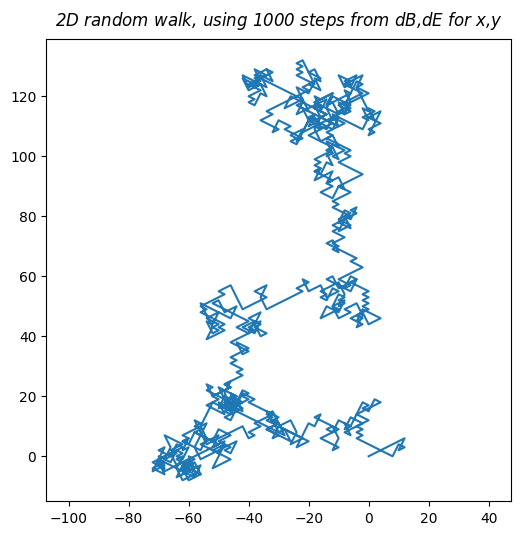

In [47]:
xname, yname, ns = 'dB', 'dE', 1000 # changer les valeurs pour tester différentes configurations
plot_walk2D(xname, yname, ns)

Ecrire la suite d'instructions permettant de vérifier expérimentalement que le résultat sur le carré de la distance moyenne est également valable pour les marches aléatoires 2D (on testera sur quelques combinaisons **`xname`** et **`yname`**) :

In [48]:
distances, ns, nw = {}, 2000, 10000 # nombre de pas et nombre de marches
# c'est une simple extension 2D de la version 1D écrite ci-dessus

### 6 - Simulation d'une marche aléatoire 3D

Pour simuler une marche aléatoire 3D, on retrouve les deux mêmes approches possibles, selon que l'on considère les déplacements sur les 3 axes comme des processus indépendants ou non. A nouveau on va se limiter à la première approche pour simplifier l'implémentation.

Il s'agit donc d'écrire une fonction **`plot_walk3D(xname, yname, zname, ns)`** qui permet de générer et d'afficher une marche aléatoire 3D de **`ns`** étapes temporelles, en utilisant la liste **`xname`** (resp. **`yname`** et **`zname`**) pour le choix des déplacements aléatoires en $x$ (resp. $y$ et $z$). On utilisera évidemment une projection 3D pour le tracé :

In [50]:
def plot_walk3D(xname, yname, zname, ns):
  """generate and plot a 3D random walk, using 'ns' steps from 'xname,yname,zname' displacement lists"""
  # générer 3 marches aléatoires (pour les directions x, y et z)
  # afficher les 3 marches sur la même figure, en utilisant les différents triplets (x,y,z)
  # s'inspirer de l'exemple B3 du chapitre 6 (visualisation de surfaces d'élévation)

On affiche les marches aléatoires 3D obtenues avec différentes configurations pour **`xname`**, **`yname`**, **`zname`** et **`ns`** :

(1000,) (1000,) (1000,)


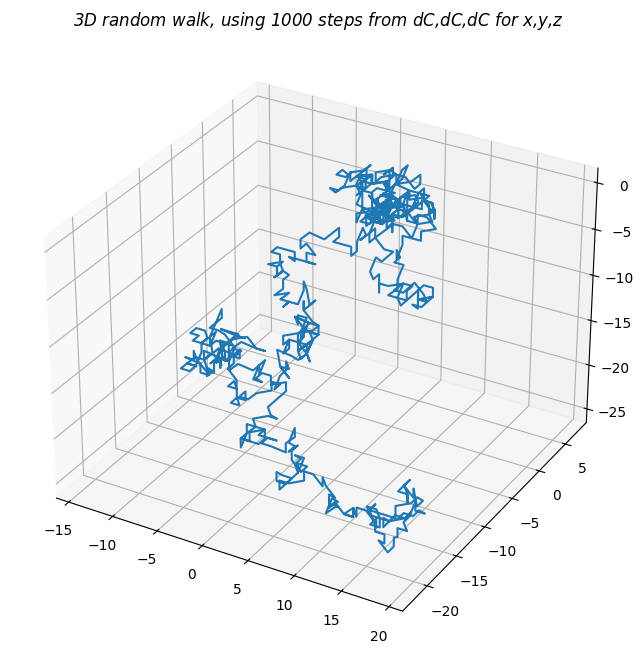

In [52]:
xname, yname, zname, ns = 'dC', 'dC', 'dC', 1000 # changer les valeurs pour tester différentes configurations
plot_walk3D(xname, yname, zname, ns)

Enfin, écrire la suite d'instructions permettant de vérifier expérimentalement que le résultat sur le carré de la distance moyenne est également valable pour les marches aléatoires 3D (on testera le résultat sur quelques combinaisons aléatoirement choisies pour **`xname`**, **`yname`** et **`zname`**) :

In [53]:
distances, ns, nw = {}, 2000, 5000 # nombre de pas et nombre de marches
# cette fois_ci, il s'agit d'une extension 3D de la version 1D

<h2 style="padding:16px; color:#FFF; background:#06D">Exercice E4 - Jeu de la vie</h2>

Le [**Jeu de la Vie**](https://fr.wikipedia.org/wiki/Jeu_de_la_vie) est un automate cellulaire dans un espace discret à 2 dimensions, conçu par le mathématicien John Conway en 1970. C'est l'un des automates cellulaires les plus simples à être [**Turing complet**](https://fr.wikipedia.org/wiki/Turing-complet) (c'est-à-dire un système formel capable de reproduire n'importe quel programme exécutable sur la machine de Turing, et donc par transitivité, n'importe quel programme écrit dans n'importe quel langage de programmation) mais c'est surtout l'automate cellulaire qui, de très loin, a été le plus étudié. Il existe même un site dédié [**ConwayLife**](https://conwaylife.com) compilant les différents résultats théoriques et expérimentaux qui ont été établis pour ce système.

Le Jeu de la Vie se déroule sur une grille discrète à deux dimensions, où chaque case, appelée **cellule**, possède deux états mutuellement exclusifs : **L (= life)** ou **D (= death)**. La simulation du comportement de l'automate consiste à calculer une série chronologique pour chaque cellule, correspondant à la séquence temporelle de ses états, sachant que l'état d'une cellule à l'étape ***n*** est entièrement déterminé par l'état de ses huits cellules voisines (N/NE/E/SE/S/SW/W/NW) à l'étape ***n-1*** selon les deux règles suivantes :

- **Règle B (= birth) :** une ***cellule D*** possédant exactement ***trois voisines L*** devient ***L***, sinon elle reste ***D***
- **Règle S (= survival) :** une ***cellule L*** possédant ***deux ou trois voisines L*** reste ***L***, sinon est devient ***D***

Dans la notation des automates cellulaires en 2D, ces règles se notent **B3S23**, raccourci pour *"birth for 3 neighbors, survival for 2 or 3 neighbors"*. En changeant ces règles, on obtient des automates avec des comportements très différents.

---
L'objectif de l'exercice est d'utiliser les fonctionnalités de **numpy** pour calculer les séries chronologiques de chaque case (avec un mécanisme similaire à celui utilisé ci-dessus, pour les marches aléatoires) et les fonctionnalités de **matplotlib** pour afficher les évolutions temporelles de l'automate sous la forme d'une séquence d'animation.

Pour valider le simulateur à écrire, on va le tester sur des structures spécifiques de grille dont l'évolution temporelle est connue. Le site *ConwayLife* mentionné ci-dessus, identifie plusieurs milliers de **motifs** qui produisent des évolutions intéressantes, certains possédant même des dénominations standardisées. Pour nos tests, on va utiliser les trois motifs suivants (cliquer sur chacun des liens pour voir la page associée sur *ConwayLife*, afin d'avoir les détails) :

> [**Blinker**](https://conwaylife.com/wiki/Blinker)  ●  [**Glider**](https://conwaylife.com/wiki/Glider)  ● 
[**Pentadecathlon**](https://conwaylife.com/wiki/Pentadecathlon)

Ecrire le code permettant de créer les matrices **numpy** associé à ces trois motifs : chaque matrice sera définie comme une matrice de valeurs binaires, où les cellules **L** sont définies par **1** et les cellules **D** par **0**. Pour chaque motif, il faut suffisamment d'espace autour des cellules du motif pour que son évolution soit cohérente, donc une taille minimale de matrice : 5x5 pour le Blinker, 8x8 pour le Glider, 11x18 pour le Pentadecathlon.

In [55]:
# on crée une grille avec le motif 'Blinker' (cf. https://conwaylife.com/wiki/Blinker)
blinker = np.full((5,5), 0); blinker[2,1:-1] = 1
# idem avec le motif 'Glider' (cf. https://conwaylife.com/wiki/Glider)
glider = 'TODO'
# idem avec le motif 'Pentadecathlon' (cf. https://conwaylife.com/wiki/Pentadecathlon)
pendec = 'TODO'
show("blinker#; glider#; pendec#")

blinker ➤
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
glider ➤
TODO
pendec ➤
TODO


---
En s'inspirant de la gestion du voisinage dans une grille 2D mise en oeuvre dans la fonction **`show_maze`** (cf. exercice **D2**), écrire une fonction **`step(grid)`** qui prend en la grille binaire **`grid`** (représentant l'automate à l'étape **n**) et la modifie pour obtenir l'automate à l'étape **n+1** en appliquant les règles de Conway (**B3S23**) :

In [57]:
def step(grid):
  """apply a single step of "Conway's Game of Life" cellular automaton on provided binary grid"""
# utiliser une variable 'neighbors' pour stocker le nombre de voisins pour chaque cellule de la grille
# (attention aux cas particuliers pour les bords et les coins)
# utiliser une variable 'birth' pour stocker les indices des cases qui passent de D à L (règle B3)
# utiliser une variable 'survival' pour stocker les indices des cases qui passent de L à L (règle S23)
# mettre à jour la variable 'grid' (pas besoin d'un 'return', puisque 'grid' est passée par référence)

Vérifier l'implémentation en affichant la grille du Blinker, après 1 et 2 appels à **`step`** :

In [59]:
grid = blinker.copy(); show('grid#'); step(grid); show('grid#'); step(grid); show('grid#')

grid ➤
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
grid ➤
[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]
grid ➤
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


---
Ecrire les instructions permettant de visualiser les 8 premières étapes d'évolution du Glider, sous la forme d'une figure **matplotlib** composée de 8 images réparties dans une grille 2x4 (utiliser les commandes **`mp.subplot`** et **`mp.imshow`**). La seconde ligne d'images devrait être similaire à la première ligne, avec le motif qui s'est décalé d'une case vers le sud-est :

In [60]:
grid = glider.copy() # on utilise le motif du Glider
# TODO (créer les 8 images via une boucle 'for')

De même, écrire les instructions permettant de visualiser les 16 premières étapes d'évolution du Pentadecathlon, sous la forme d'une figure **matplotlib** composée de 16 images réparties dans une grille 4x4. La dernière case devrait être identique à la première, puisque l'évolution de ce motif correspond à un cycle de 15 étapes :

In [62]:
grid = pendec.copy() # on utilise le motif du Pentadecathlon
# TODO (créer les 16 images via une boucle 'for')

---
Enfin, on va utiliser les fonctionnalités d'animation de **matplotlib** pour créer un fichier vidéo permettant d'afficher l'évolution temporelle d'un automate cellulaire. En s'inspirant de l'exemple d'animation vu à la fin du chapitre 6, écrire une fonction **`lifegame(grid, frames=50, fps=10, filename='lifegame.mp4')`** permettant de créer un fichier **`filename`**, au format MP4 avec une fréquence d'images **`fps`**, encodant une animation correspondant à **`frames`** étapes de l'automate défini par **`grid`**. Cette fonction utilisera une fonction **`animate(n, *args)`** chargée de calculer l'image numéro **`n`** de la séquence d'animation dont l'argument **`args`** sera un tuple **`(grid, image)`** contenant les données nécessaires au calcul. Le format de l'image vidéo devra utiliser le même ratio (largeur/hauteur) que celui de la grille de l'automate.

In [64]:
from matplotlib.animation import FuncAnimation as animation # import de la fonction d'animation
from matplotlib import rc; rc('animation', html='jshtml') # on utilise 'jshtml' pour les animations

In [65]:
def animate(n, *args):
  """generate frame 'n' of the animation sequence, using (grid, image) stored in 'args'"""
  # TODO

In [67]:
def lifegame(grid, filename='lifegame.mp4', frames=50, fps=10):
  """generate 'steps' animation frames showing the evolution of 'grid' and store as MP4 video file"""
  # TODO

On teste le générateur de vidéo, sur le Pentadecathlon puis sur un motif aléatoire :

In [69]:
grid = pendec.copy() # on utilise le motif du Pentadecathlon
#grid = np.random.randint(0, 2, (30,60)) # on utilise un motif purement aléatoire

anim = lifegame(grid, 'test.mp4', 60) # création de la vidéo d'animation dans 'test.mp4'
#anim # inclure l'animation dans le notebook [TRES COUTEUX EN MEMOIRE : n'utiliser que pour débugger]

In [ ]:
import IPython.display as dp
dp.Video('test.mp4', height=256, html_attributes='autoplay loop')

<h2 style="padding:16px; color:#FFF; background:#06D">Exercice E5 - Lancers de dés pipés</h2>

Dans le chapitre 6, on a vu la création d'un histogramme correspondant aux lancers répétés d'un nombre **nd**  de dés à **nf** faces. Lorsque la probabilité d'apparition des faces des dés suit une distribution uniforme, le [**théorème central limite**](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_central_limite) montre que la distribution de la somme des dés va tendre vers une distribution gaussienne, si on fait tendre **nd** vers l'infini.

L'objectif de cet exercice est d'étudier ce qui passe lorsque **les dés sont pipés**, c'est-à-dire qu'il n'y a pas équi-probabilité pour l'apparition de chaque face. On commence par reprendre le code du cours pour le décomposer en deux parties :

- une fonction **`balanced_rolls(nd, nf, nr)`** qui prend comme arguments, le nombre de dés **nd**, le nombre de faces **nf** et le nombre de lancers **nr** et retourne un vecteur **`rolls`** de taille **nr** contenant la somme des dés obtenu pour chaque lancer, en utilisant une distribution uniforme pour les faces des dés
- une fonction **`histo_rolls(nd, nf, nr, func=balanced_rolls, title='')`** qui simule les lancers de dés en appelant la fonction **`func(nd, nf, nr)`** (égale à **`balanced_rolls`** par défaut) et affiche l'histogramme des lancers obtenus en ajustant automatiquement les bornes *min* et *max* de l'histogramme en fonction de **nd** et **nf**

In [71]:
def balanced_rolls(nd, nf, nr):
  """simulate 'nr' rolls of 'nd' balanced dice with 'nf' faces, return sum of each roll as a vector"""
  # TODO

On teste la fonction sur quelques jeux de paramètres ***(nd, nf, nr)*** :

In [73]:
# Note : enlevez, un par un, le caractère '#' devant chacun ligne pour tester les différents cas
nd, nf, nr = 2, 6, 500000 # 2 dés, 6 faces, 500 000 lancers
#nd, nf, nr = 2, 60, 500000 # 2 dés, 60 faces, 500 000 lancers
#nd, nf, nr = 20, 6, 500000 # 20 dés, 6 faces, 500 000 lancers
#nd, nf, nr = 60, 2, 500000 # 60 dés, 2 faces, 500 000 lancers

rolls = balanced_rolls(nd, nf, nr) # on génère les lancers aléatoires
show("(nd,nf,nr); rolls;") # et on affiche les propriétés statistiques des valeurs obtenues
show("rolls.min(); rolls.max(); rolls.mean(); rolls.std(); np.percentile(rolls, 10*np.arange(11))")

(nd,nf,nr) ➤ (2, 6, 500000)
rolls ➤ [ 9  7  5 ...  6 11 11]

rolls.min() ➤ 2
rolls.max() ➤ 12
rolls.mean() ➤ 6.997968
rolls.std() ➤ 2.4124452057976367
np.percentile(rolls, 10*np.arange(11)) ➤ [ 2.  4.  5.  6.  6.  7.  8.  8.  9. 10. 12.]


Comme on peut le constater sur les 2 derniers jeux de paramètres ci-dessus, lorsque le nombre de dés augmente, il est très difficile d'obtenir le minimum théorique (toutes les faces à 1) ou le maximum théorique (toutes les faces à **nf**), même pour un grand nombre de lancers. Par exemple, pour 60 dés à 2 faces, il faudrait obtenir 60 pour le *min* et 120 pour le *max*, ce qui n'arrive quasiment jamais, même avec 500000 lancers. Il faut donc que la fonction **`histo_rolls`** positionne explicitement les bornes de l'histogramme à ces valeurs théoriques, au lieu d'utiliser le *min* et le *max* des valeurs obtenues :

In [74]:
def histo_rolls(nd, nf, nr, func=balanced_rolls, title=''):
  """build and show histogram for 'nr' rolls of nd' dice with 'nf' faces, using 'func' as random function"""
  # TODO

On teste sur les mêmes jeux de paramètres que précédemment :

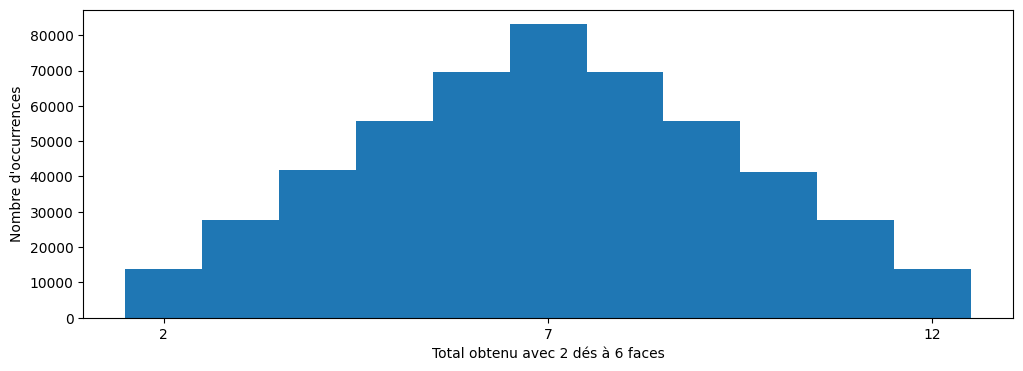

In [76]:
# Note : enlevez, un par un, le caractère '#' devant chacun ligne pour tester les différents cas
nd, nf, nr = 2, 6, 500000 # 2 dés, 6 faces, 500 000 lancers
#nd, nf, nr = 2, 60, 500000 # 2 dés, 60 faces, 500 000 lancers
#nd, nf, nr = 20, 6, 500000 # 20 dés, 6 faces, 500 000 lancers
#nd, nf, nr = 60, 2, 500000 # 60 dés, 2 faces, 500 000 lancers

histo_rolls(nd, nf, nr)

---
Pour tester ce que donne cette simulation avec des dés pipés, il faut définir plusieurs distributions non-uniformes définissant les probabilités d'apparition des différentes faces du dé. La figure ci-dessous montre quelques distributions intéressantes à étudier, visualisée ici dans le cas particulier d'un dé à 9 faces :

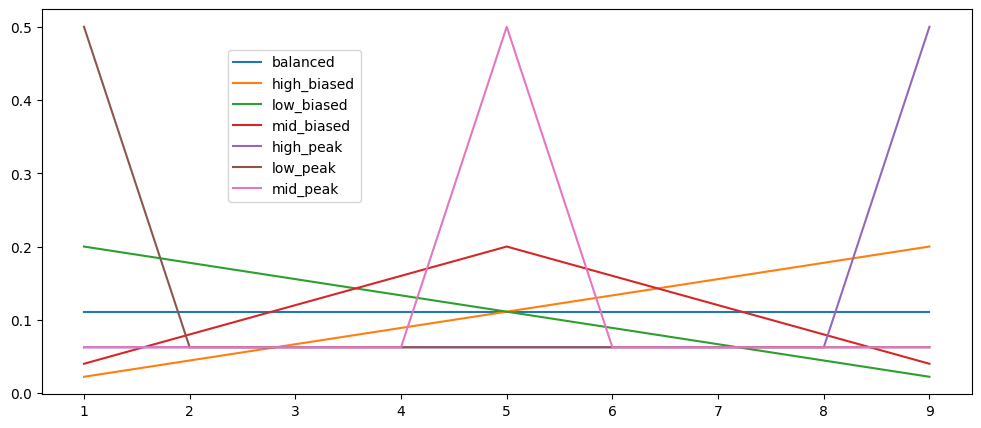

In [77]:
mp.figure(figsize=(12,5));
mp.plot([1,2,3,4,5,6,7,8,9], [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9], label='balanced')
mp.plot([1,2,3,4,5,6,7,8,9], [1/45,2/45,3/45,4/45,5/45,6/45,7/45,8/45,9/45], label='high_biased')
mp.plot([1,2,3,4,5,6,7,8,9], [9/45,8/45,7/45,6/45,5/45,4/45,3/45,2/45,1/45], label='low_biased')
mp.plot([1,2,3,4,5,6,7,8,9], [1/25,2/25,3/25,4/25,5/25,4/25,3/25,2/25,1/25], label='mid_biased')
mp.plot([1,2,3,4,5,6,7,8,9], [1/16,1/16,1/16,1/16,1/16,1/16,1/16,1/16,8/16], label='high_peak')
mp.plot([1,2,3,4,5,6,7,8,9], [8/16,1/16,1/16,1/16,1/16,1/16,1/16,1/16,1/16], label='low_peak')
mp.plot([1,2,3,4,5,6,7,8,9], [1/16,1/16,1/16,1/16,8/16,1/16,1/16,1/16,1/16], label='mid_peak');
mp.legend(loc=(0.2, 0.5));

- **high_biased** : la probabilité croît linéairement lorsque le numéro de face augmente
- **low_biased** : la probabilité décroît linéairement lorsque le numéro de face augmente
- **mid_biased** : la probabilité croît linéairement jusqu'au numéro médian, puis décroît linéairement
- **high_peak** : la face de numéro max a une probabilité de 1/2, les autres faces sont équiprobables
- **low_peak** : la face de numéro min a une probabilité de 1/2, les autres faces sont équiprobables
- **mid_peak** : la face de numéro médian a une probabilité de 1/2, les autres faces sont équiprobables<br> (si le nombre de faces est pair, les deux faces centrales ont une probabilité de 1/4 chacune)

---
Ecrire la fonction **`high_biased_rolls(nd, nf, nr)`** similaire à la fonction **`balanced_rolls(nd, nf, nr)`** mais qui applique une distribution **high_biased** (au lieu d'une distribution **balanced**) à la probabilité d'apparition des faces. La distribution devra évidemment s'adapter au nombre de faces du dé (on suppose **nf > 2**). Comme il s'agit d'une function de distribution discrète, la solution la plus simple consiste à employer la fonction **`np.random.choice`** vue en cours :

In [78]:
def high_biased_rolls(nd, nf, nr):
  """simulate 'nr' rolls of 'nd' dice with 'nf' faces, using a 'high_biased' distribution"""
  # TODO

On teste la fonction sur les mêmes jeux de paramètres ***(nd, nf, nr)*** que précédemment :

rolls ➤ [ 9 11 10 ...  7  7 10]
rolls.min() ➤ 2
rolls.max() ➤ 12
rolls.mean() ➤ 8.662302
rolls.std() ➤ 2.1077936475841272
np.percentile(rolls, 10*np.arange(11)) ➤ [ 2.  6.  7.  8.  8.  9.  9. 10. 11. 11. 12.]


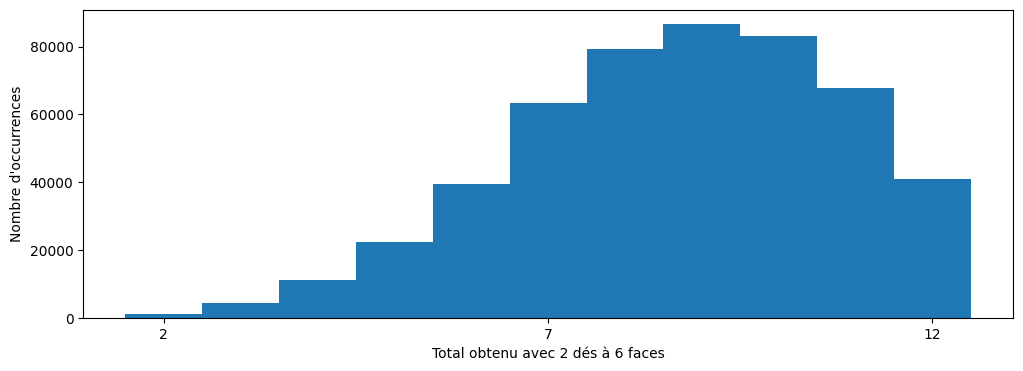

In [80]:
# enlever les commentaires, un par un, pour tester chacun des des 4 jeux de paramètres
nd, nf, nr = 2, 6, 500000 # 2 dés, 6 faces, 500 000 lancers
#nd, nf, nr = 2, 60, 500000 # 2 dés, 60 faces, 500 000 lancers
#nd, nf, nr = 20, 6, 500000 # 20 dés, 6 faces, 500 000 lancers
#nd, nf, nr = 60, 3, 500000 # 60 dés, 3 faces, 500 000 lancers

rolls = high_biased_rolls(nd, nf, nr) # on génère les lancers aléatoires avec la distribution **high_biased**
show("rolls; rolls.min(); rolls.max()") # on affiche les propriétés statistiques des valeurs obtenues
show("rolls.mean(); rolls.std(); np.percentile(rolls, 10*np.arange(11))")
histo_rolls(nd, nf, nr, high_biased_rolls) # puis l'histogramme associé

Comparer sur un même graphique, en utilisant respectivement la distribution **balanced** et la distribution **high_biased** :
- l'évolution de la moyenne des lancers de 6 dés, lorsque le nombre de faces varie de 2 à 60, 
- l'évolution de la moyenne des lancers de dés à 6 faces, lorsque le nombre de dés varie de 2 à 60

In [ ]:
# TODO

---
Refaire le même type de tests avec les autres distributions définies plus haut :

> **low_biased**  ●  **mid_biased**  ●  **high_peak**  ●  **low_peak**  ●  **mid_peak**

In [ ]:
# TODO

rolls ➤ [12  8  8 ... 12  9 12]
rolls.min() ➤ 2
rolls.max() ➤ 12
rolls.mean() ➤ 9.002712
rolls.std() ➤ 2.5517352223645773
np.percentile(rolls, 10*np.arange(11)) ➤ [ 2.  5.  7.  8.  8.  9. 10. 11. 12. 12. 12.]


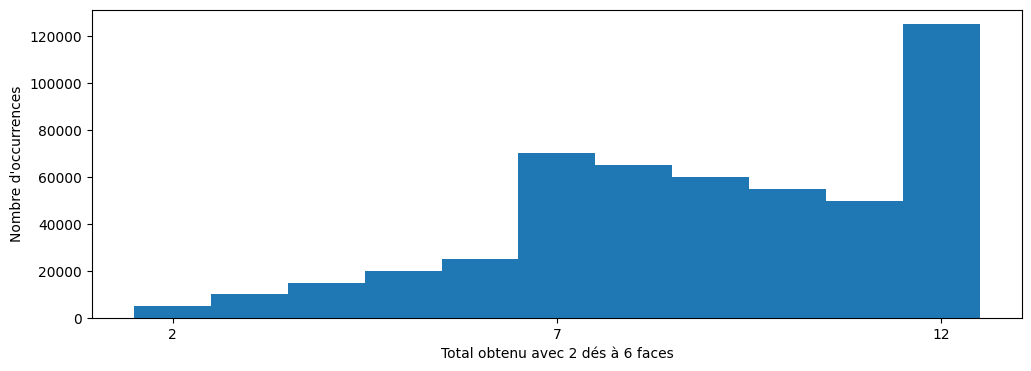

In [83]:
# enlever les commentaires, un par un, pour tester chacun des des 4 jeux de paramètres
nd, nf, nr = 2, 6, 500000 # 2 dés, 6 faces, 500 000 lancers
#nd, nf, nr = 2, 60, 500000 # 2 dés, 60 faces, 500 000 lancers
#nd, nf, nr = 20, 6, 500000 # 20 dés, 6 faces, 500 000 lancers
#nd, nf, nr = 60, 2, 500000 # 60 dés, 2 faces, 500 000 lancers

rolls = high_peak_rolls(nd, nf, nr) # on génère les lancers aléatoires avec la distribution **high_peak**
show("rolls; rolls.min(); rolls.max()") # on affiche les propriétés statistiques des valeurs obtenues
show("rolls.mean(); rolls.std(); np.percentile(rolls, 10*np.arange(11))")
histo_rolls(nd, nf, nr, high_peak_rolls) # puis l'histogramme associé

<h2 style="padding:16px; color:#FFF; background:#06D">Exercice E6 - Convolution d'images à l'aide de la FFT</h2>

Le package **numpy** possède également un module **fft** permettant de calculer la transformée de Fourier discrète d'une matrice 1D ou 2D, en utilisant l'algorithme [**FFT**](https://fr.wikipedia.org/wiki/Transformation_de_Fourier_rapide) *(Fast Fourier Transform)*. La transformée de Fourier permet de passer un signal du ***domaine spatial*** au ***domaine spectral***, ce qui permet d'étudier les différentes fréquences qui régissent ses variations. Ce processus possède évidemment de très nombreuses applications en Sciences des Données, notamment lorsqu'on cherche à identifier des cycles ou des pseudos-cycles dans l'évolution des données mesurées.

L'objectif de cet exercice est simplement de montrer l'utilisation de ce module **fft** sur un exemple ultra-classique : le filtrage d'images monochromes par application de convolutions discrètes. A partir des fonctions de base fournit par le module **fft**, on peut créer les deux fonctions **`fft2D(spatial)`** et **`ifft2D(spectral)`** dont les codes sont présentés ci-dessous. La première prend en entrée une matrice 2D à valeurs réelles, correspondant à l'échantillonnage d'un signal dans le domaine spatial, et retourne une matrice de même taille, correspondant à l'échantillonnage du même signal, mais cette fois-ci dans le domaine spectral. La seconde effectue l'opération inverse (d'où le **i** en préfixe) : elle prend un signal échantilonné dans le domaine spectral et le (re)convertit dans le domaine spatial. De manière optionnelle, les deux fonctions peuvent appliquer un décalage de l'affichage, par exemple pour placer la composante constante du spectre au centre de l'image :

In [84]:
def fft2D(spatial, shift=True):
  """apply Fast Fourier Transform on 2D spatial image, with optional shift to center image"""
  return np.fft.fftshift(np.fft.fft2(spatial)) if shift else np.fft.fft2(spatial)

def ifft2D(spectral, shift=True):
  """apply Inverse Fast Fourier Transform on 2D spectral image, with optional shift to center image"""
  return np.fft.ifftshift(np.fft.ifft2(spectral)) if shift else np.fft.ifft2(spectral)

Pour simplifier les calculs et la visualisation, on se limite au cas des images monochromes dans cet exercice. On fournit ainsi quelques images de test avec des dimensions variées, qu'on va stocker dans un dictionnaire **`images`**. Toutes ces images sont ***normalisées*** par construction (autrement dit, les valeurs des pixels sont toutes comprises entre 0 et 1) :

In [85]:
chess = np.tile(2*[[0,0,1,1]] + 2*[[1,1,0,0]], (4,4)) # échiquier (taille = 16x16)
grid = np.tile(3*[[1,1,1,0]] + [4*[0]], (8,8)) # grille (taille = 32x32)
noise = np.random.rand(64,64) # bruit uniforme (taille = 64x64)
sine = np.tile(np.sin(np.linspace(0,np.pi,128)), (128,1)) # sinusoïde horizontale (taille = 128x128)
normal = np.random.normal(0, 1, (256,256)) # bruit normal (taille = 256x256)
normal -= normal.min(); normal /= normal.max() # normalisation dans l'intervalle [0,1]
tiger = mp.imread('IMG/tigerG.jpg') / 255 # tigre avec normalisation (taille = 480x640)

images = dict(chess=chess, grid=grid, sine=sine, noise=noise, normal=normal, tiger=tiger)

---
Ecrire une fonction **`show_fft(image, title='')`** permettant d'afficher côte à côte, le domaine spatial et le domaine spectral de l'image fournie en paramètre. On rajoutera les labels ***(domaine spatial)*** et ***(domaine spectral)*** dans les titres des deux images, pour identifier les deux versions. Il faut noter que les images spectrales sont généralement très sombres par rapport aux images spatiales. On va donc systématiquement inclure une [**correction gamma**](https://en.wikipedia.org/wiki/Gamma_correction) pour éclaircir les images spectrales. La valeur de **`gamma`** comprise entre 0 (= éclaircissement infini) et 1 (= pas d'éclaircissement) peut être fournie en paramètre optionnel par l'utilisateur, ou à défaut, calculé automatiquement par la fonction **`auto_gamma`** définie ci-dessous. Le principe implémenté pour **`auto_gamma`** consiste à calculer la valeur de gamma permettant d'obtenir une luminosité moyenne proche de 0.5 pour l'image spectrale passée en paramètre :

In [86]:
def auto_gamma(image):
  """compute value of gamma correction to get mean luminosity of provided image around 0.5"""
  image = np.abs(image); image -= image.min(); image /= image.max() # normalize image in range [0,1]
  return -np.log(2) / np.log(image.mean()) # compute gamma to force mean luminosity as middle gray

In [87]:
def show_fft(image, title='', gamma=None):
  """show spatial and spectral versions for provided image"""
  # TODO : appliquer une FFT sur l'image fournie et afficher les images spatiale et spectrale côte à côte
  # TODO : la luminosité de l'image spectrale est augmentée par correction gamma via la valeur fournie
  # TODO : si 'gamma' n'est pas fournie, utiliser 'auto_gamma' sur l'image spectrale pour l'obtenir

Vérifier l'implémentation sur les différentes images de test :

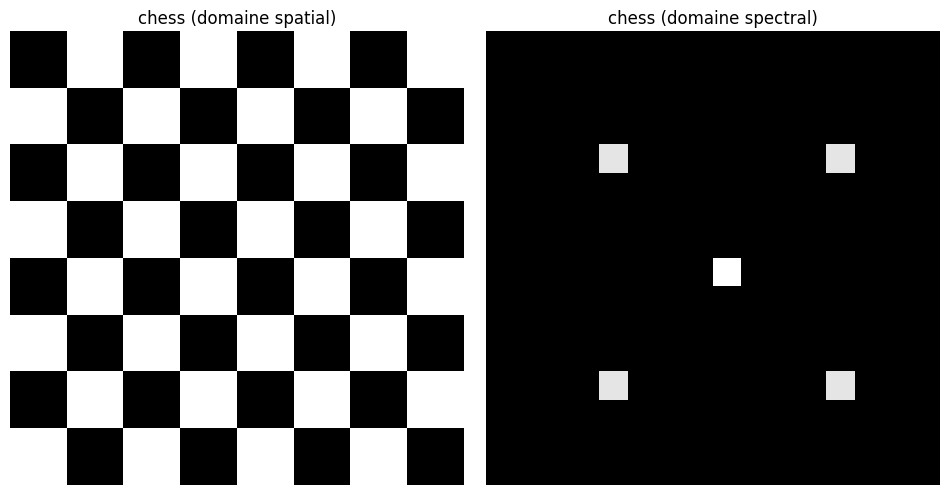

In [89]:
name = 'chess'; show_fft(images[name], name) # tester les autres images

---
On fournit les fonctions génératrices de quelques noyaux de convolution 2D classiques qu'on va stocker dans un dictionnaire **`kernels`**. Chaque fonction est définie par 4 paramètres : ***(w, h)*** correspondent à la taille de l'image et ***(kw, kh)*** correspondent à la taille du noyau, exprimé comme un ratio de la taille de l'image :

In [90]:
# generate sample grid and adjust kernel size according to image size
make_grid = lambda w,h,kw,kh: (*np.meshgrid(range(-w//2,w//2), range(-h//2,h//2)), 2/kw/w, 2/kh/h)

def box(w, h, kw=1, kh=1):
  """create sampling matrix for a 2D box function"""
  W, H, kw, kh = make_grid(w, h, kw, kh); mat = np.maximum(np.abs(kw*W), np.abs(kh*H))
  return np.where(mat <= 1, 1, 0) # 2D box kernel

def pyramid(w, h, kw=1, kh=1):
  """create sampling matrix for a 2D pyramid function"""
  W, H, kw, kh = make_grid(w, h, kw, kh); mat = 1 - np.maximum(np.abs(kw*W), np.abs(kh*H))
  return np.where(mat > 0, mat, 0) # 2D pyramid kernel

def disk(w, h, kw=1, kh=1):
  """create sampling matrix for a 2D disk function"""
  W, H, kw, kh = make_grid(w, h, kw, kh); mat = (kw*W)**2 + (kh*H)**2
  return np.where(mat < 1, 1, 0) # 2D disk kernel2D

def cone(w, h, kw=1, kh=1):
  """create sampling matrix for a 2D cone function"""
  W, H, kw, kh = make_grid(w, h, kw, kh); mat = 1 - ((kw*W)**2+(kh*H)**2)**0.5
  return np.where(mat > 0, mat, 0) # 2D cone kernel

def bell(w, h, kw=1, kh=1):
  """create sampling matrix for a 2D bell function (= cone smoothed by Hermite smoothstep function)"""
  W, H, kw, kh = make_grid(w, h, kw, kh); mat = 1 - ((kw*W)**2+(kh*H)**2)**0.5
  return np.where(mat > 0, mat*mat*mat*(10+mat*(6*mat-15)), 0) # 2D cone kernel

def gauss(w, h, kw=1, kh=1):
  """create sampling matrix for a 2D gaussian function"""
  W, H, kw, kh = make_grid(w, h, kw, kh); return np.exp(-(kw*W)**2 -(kh*H)**2) # 2D gaussian kernel

kernels = dict(box=box, pyramid=pyramid, disk=disk, cone=cone, bell=bell, gauss=gauss) # store all kernels

Générer les image des noyaux discrets à partir de ces fonctions, et les afficher avec la fonction **`show_fft`**. Vérifier les effets obtenus en changeant de noyau et en modifiant les tailles de l'image **(w,h)** et les tailles des noyaux **(kw, kh)** définis comme ratios de la taille de l'image :

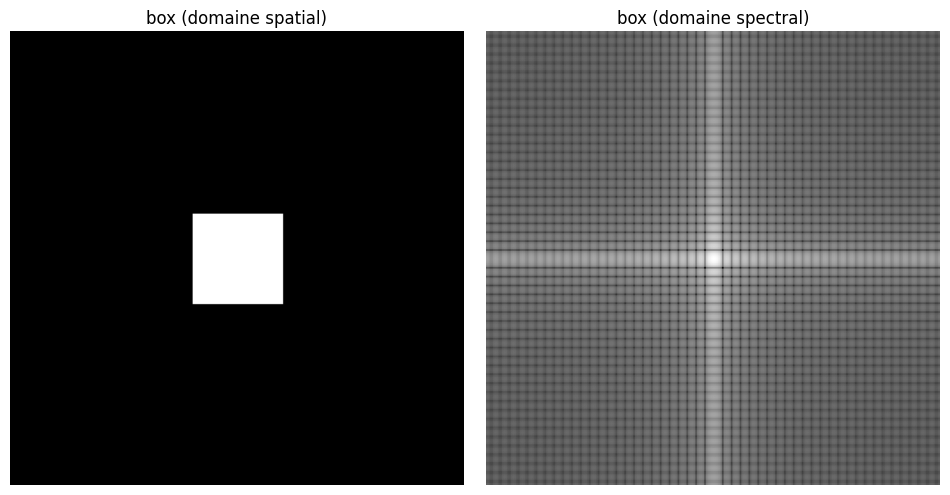

In [91]:
name = 'box'; show_fft(kernels[name](256, 256, 0.2, 0.2), name) # tester les autres noyaux

---
Les images ci-dessus supposent que le noyau de convolution est défini dans le domaine spatial. Mais en pratique, il est beaucoup plus efficace d'utiliser un noyau dans son domaine spectral, car le filtrage s'effectue par une ***simple multiplication des images spectrales*** alors que ce même filtrage dans le domaine spatial, nécessite de mettre en oeuvre une ***convolution des images spatiales***, opération numérique beaucoup plus coûteuse. Par conséquent, si on suppose que les noyaux définis ci-dessus sont générés dans le domaine spectral, il faut donc utiliser la transformée de Fourier inverse pour obtenir l'image du noyau dans le domaine spatial.

A partir de cette observation, modifier le code de la fonction **`show_fft`** pour rajouter un booléen **`inverse`** dans la liste des paramètres avec le rôle suivant : si **`inverse == False`** (valeur par défaut), cela signifie que l'utilisateur fournit l'image spatiale et que la fonction doit calculer l'image spectrale, par contre si **`inverse == True`**, cela signifie que c'est l'image spectrale qui est fournie et donc la fonction doit calculer l'image spatiale par transformée de Fourier inverse :

In [92]:
def show_fft(image, title='', gamma=None, inverse=False):
  """show spatial and spectral versions for provided image (compute the second image by FFT or IFFT)"""
  # TODO : compléter la version précédent de la fonction 'show_fft'

Utiliser la fonction **`show_fft`** modifiée, pour générer les versions spatiales des noyaux précédents appliqués dans le domaine spectral. Vérifier les effets obtenus en changeant de noyau et en modifiant les paramètres du noyau :

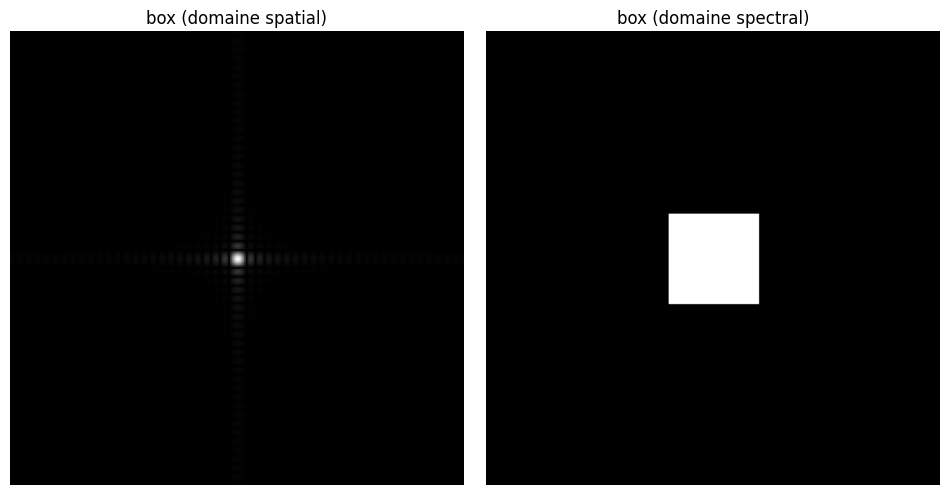

In [94]:
name = 'box'; show_fft(kernels[name](256, 256, 0.2, 0.2), name, 1, True) # tester les autres noyaux

---
Enfin, écrire une fonction **`show_convolution(iname, kname, ratio=1, gamma=None)`** qui prend en paramètre le nom d'une image spatiale **`iname`**, le nom d'un noyau spectral **`kname`** et, de manière optionnelle,
un **`ratio`** spécifiant la taille du noyau (comme ratio de la taille de l'image) et un coefficient **`gamma`** pour éclaircir les images spectrales. Lorsque la valeur de **`gamma`** n'est pas fournie, on pourra la calculer automatiquement en utilisant la fonction **`auto_gamma`** définie plus haut.

La fonction **`show_convolution`** doit d'abord appliquer une FFT sur **`iname`** pour calculer son image spectrale, puis multiplier cette image par celle du noyau spectral pour obtenir le filtrage souhaité, et enfin appliquer une FFT inverse sur le résultat afin d'obtenir sa représentation dans le domaine spatial. La fonction devra afficher un bloc de 2x2 images : en haut (*resp.* en bas) les images spatiale et spectrale avant convolution (*resp.* après convolution). Pour pouvoir comparer les images spectrales, il est primordial d'utiliser la même correction gamma sur l'image spectrale avant et après convolution. :

In [95]:
def show_convolution(iname, kname, ratio=1, gamma=None):
  """apply convolution kernel on grayscale image, and show corresponding spatial and spectral images"""
  # TODO : stocker les versions spatiale/spectrale de l'image dans les variables 'ispatial' et 'ispectral'
  # TODO : celles du noyau dans 'kspatial'/'kspectral', celles de la convolution dans 'cspatial'/'cspectral'
  # TODO : si 'gamma' n'est pas fournie, calculer sa valeur pour obtenir une luminosité moyenne à 0.5

Tester l'implémentation sur différentes images et différents noyaux :

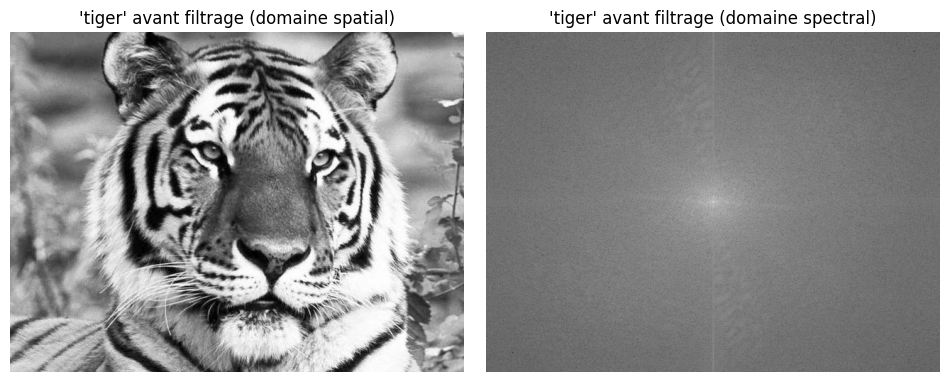

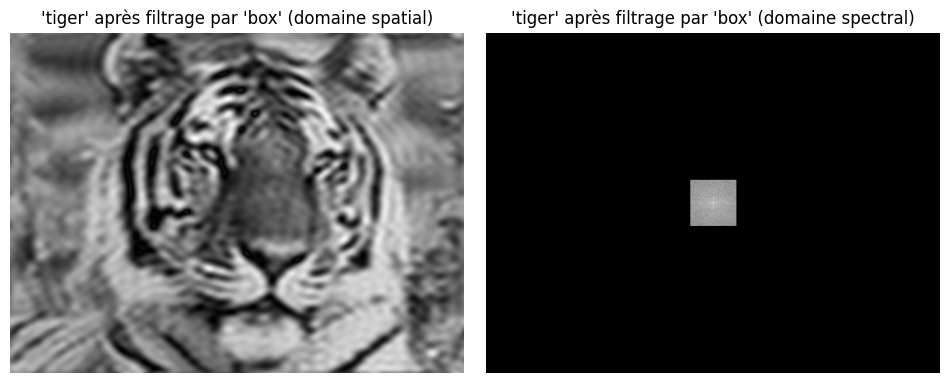

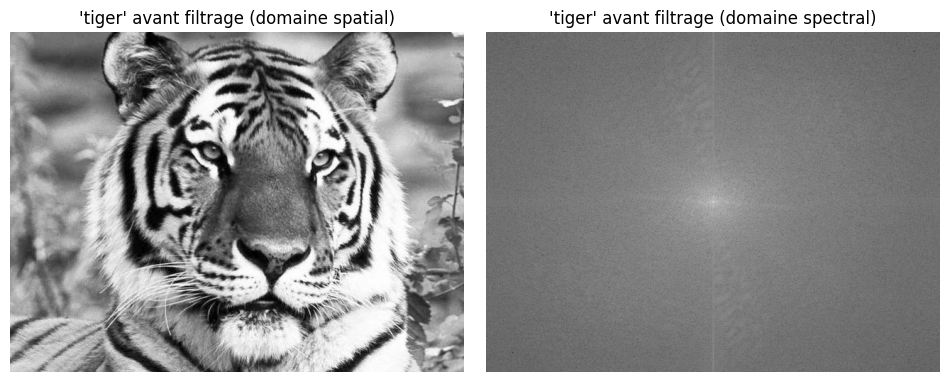

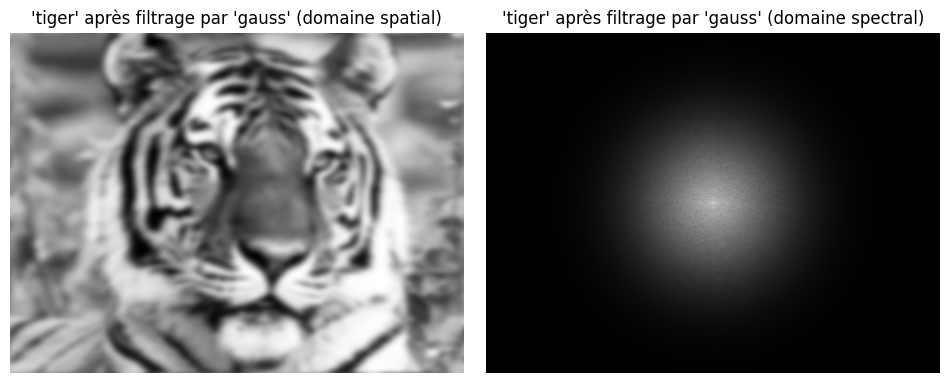

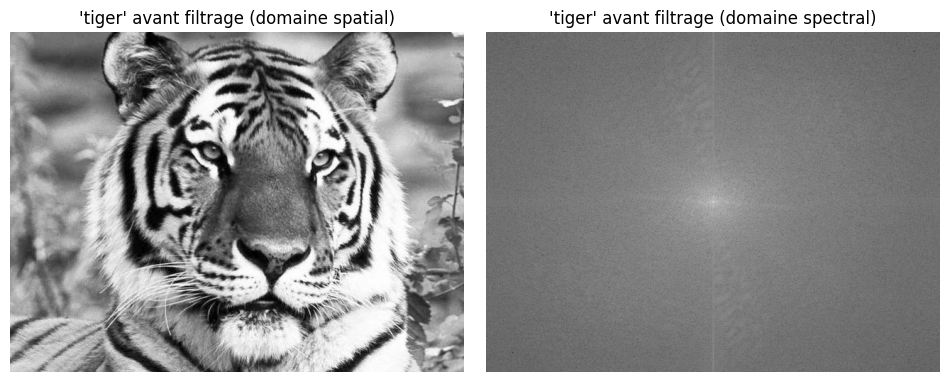

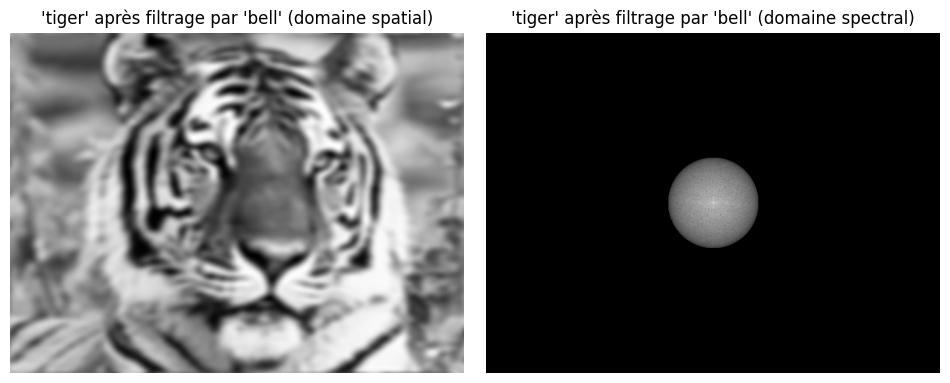

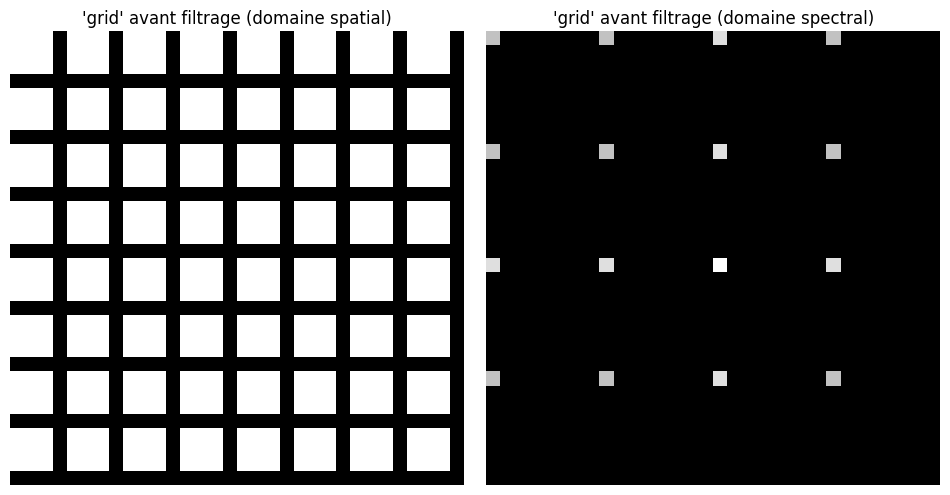

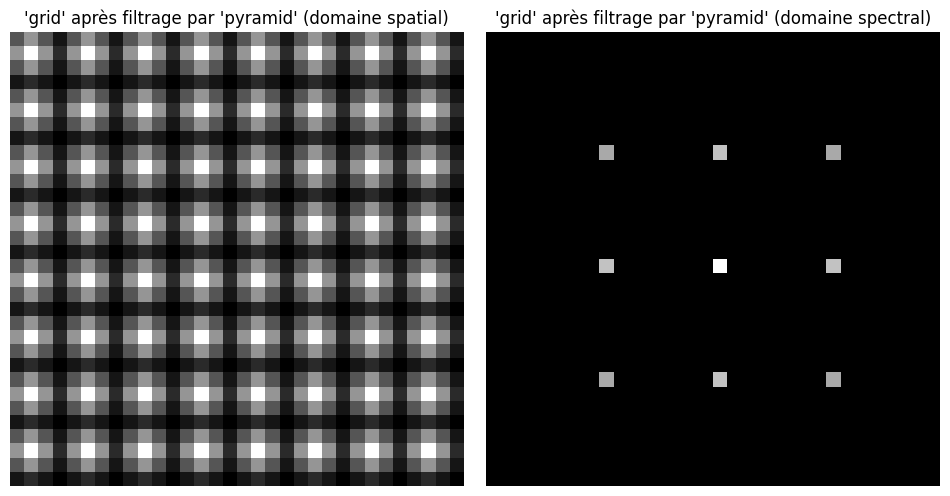

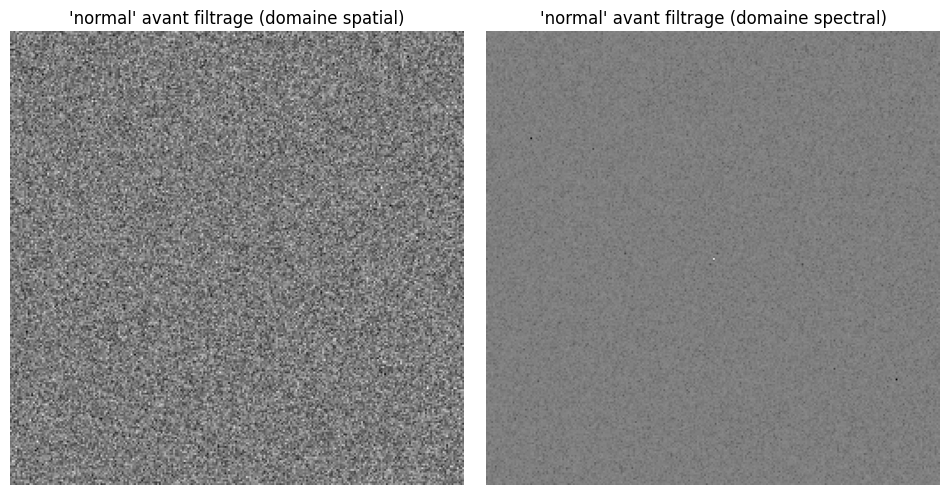

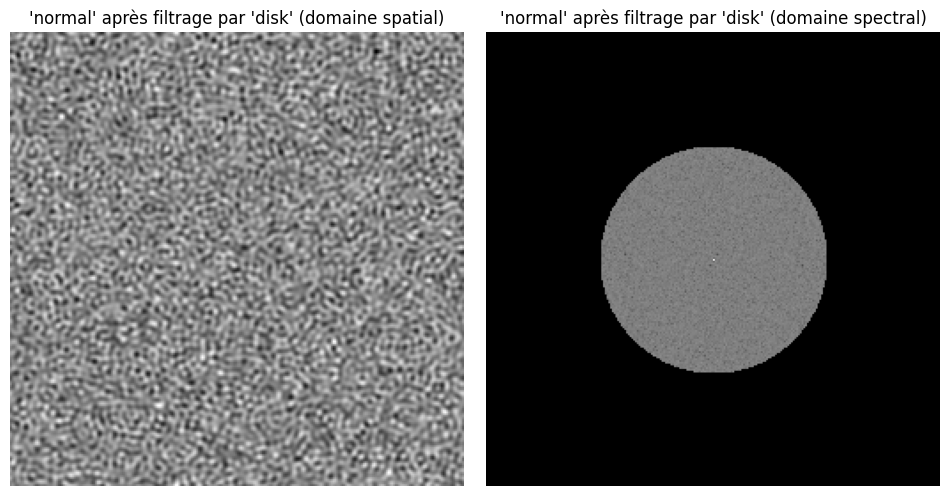

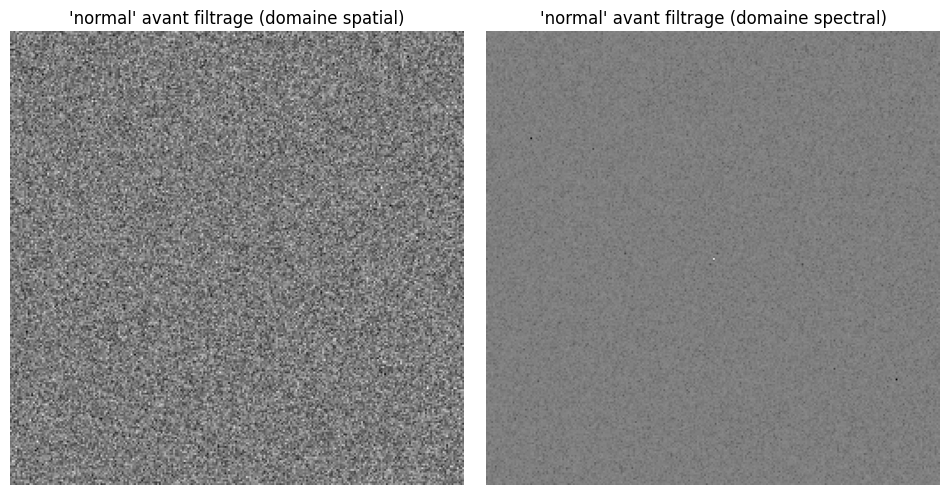

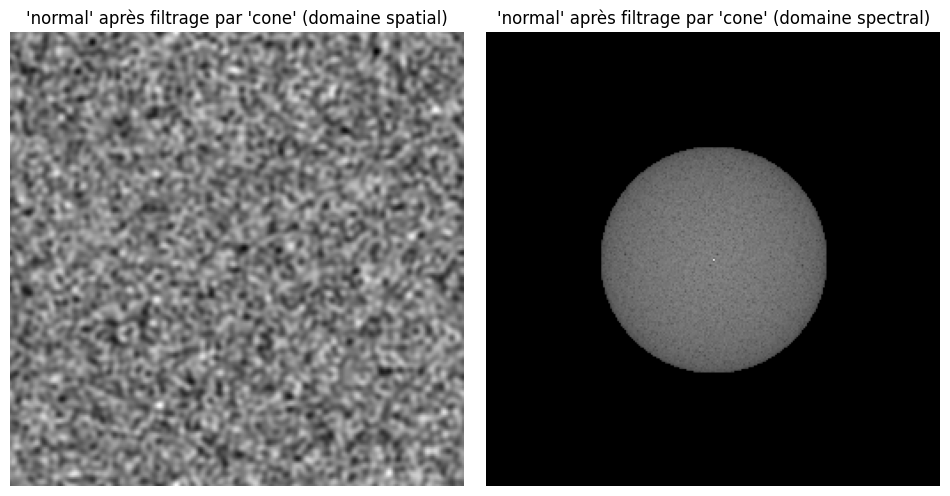

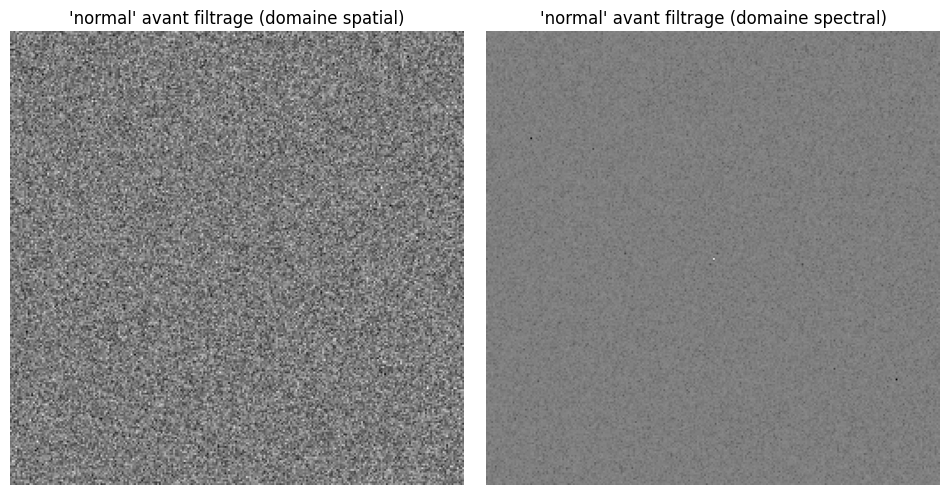

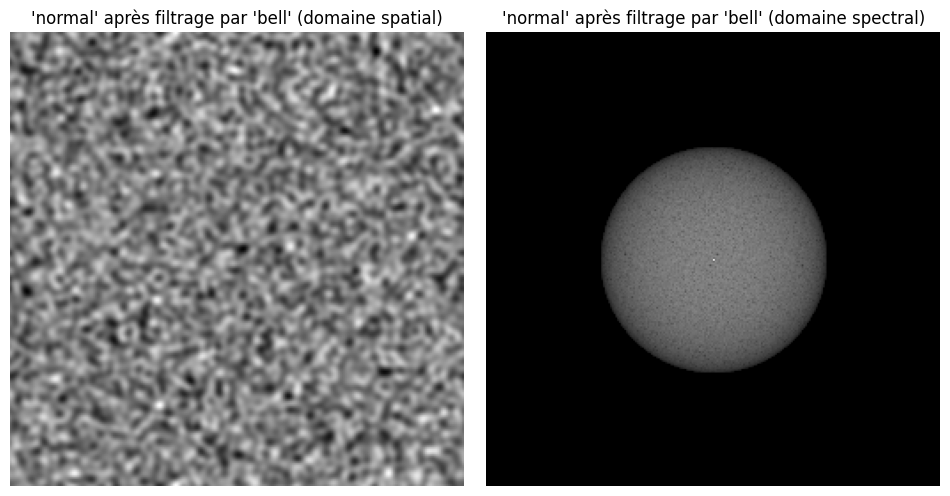

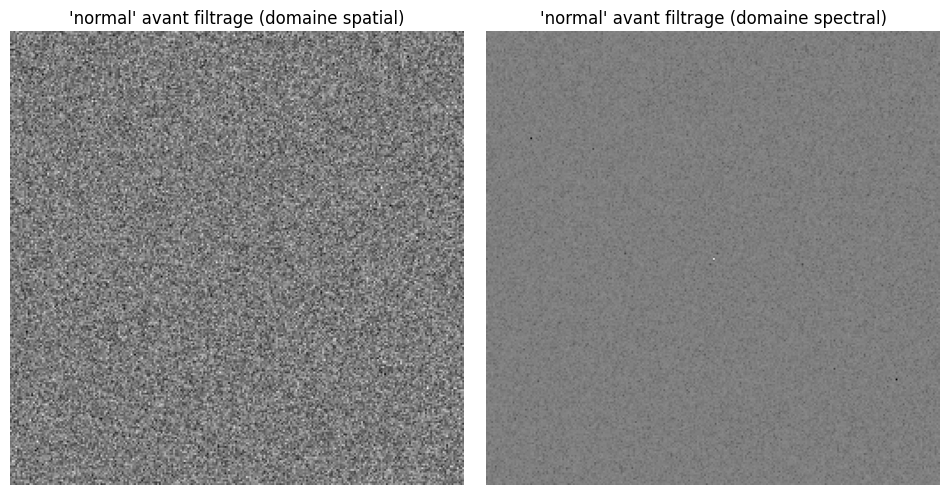

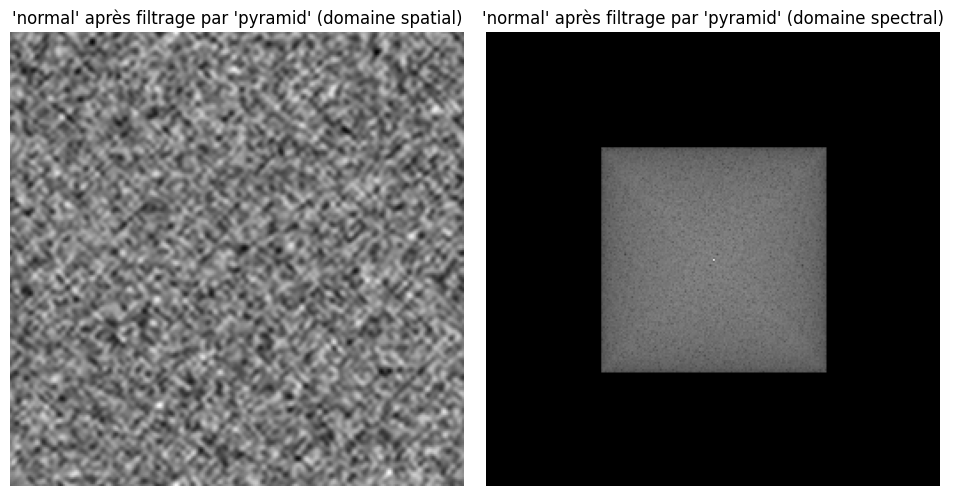

In [97]:
show_convolution('tiger', 'box', 0.1) # phénomène de Gibbs (= suroscillation, cf. wikipedia)
show_convolution('tiger', 'gauss', 0.1) # pas de suroscillation avec un filtre gaussien
show_convolution('tiger', 'bell', 0.2) # pas de suroscillation avec un filtre "cloche" (= cône lissé)
show_convolution('grid', 'pyramid', 0.75) # lissage de la grille (transitions douces entre noir et blanc)
show_convolution('normal', 'disk', 0.5) # annulation (brutale) des hautes fréquences
show_convolution('normal', 'cone', 0.5) # annulation (progressive) des hautes fréquences
show_convolution('normal', 'bell', 0.5) # annulation (encore plus progressive) des hautes fréquences
show_convolution('normal', 'pyramid', 0.5) # idem avec filtre non isotrope = artefacts sur les diagonales

<div style="padding:8px; margin:0px -20px; color:#FFF; background:#06D; text-align:right">● ● ● </div>